# Exploring the dataset containing articles scraped using newspapers3k and bs4 ("dataset_containing_articles_scraped_using_newspaper3k" and "female_athletes_articles_scraped_using_bs4_and_requests")

## Preprocessing on dataset_containing_articles_scraped_using_newspaper3k

In [431]:
import pandas as pd

dataset_file_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\dataset_containing_articles_scraped_using_newspaper3k.csv"

dataset = pd.read_csv(dataset_file_path)

dataset.head()

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No


## Number of rows & columns in dataset_containing_articles_scraped_using_newspaper3k

In [432]:
dataset_rows, dataset_columns = dataset.shape

print("No. of rows in dataset_df : ", dataset_rows)
print("No. of columns in dataset_df : ", dataset_columns)

No. of rows in dataset_df :  214
No. of columns in dataset_df :  8


In [433]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

## Checking all the unique values present in class_2_rows_test_df

In [434]:
unique_vals = dataset["Sr No"].unique()

print(len(unique_vals))

214


In [435]:
unique_vals = dataset["Website"].unique()

print(unique_vals)

['ESPN']


In [436]:
unique_vals = dataset["Category"].unique()

print(unique_vals)

['Cricket' 'tennis']


In [437]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

In [438]:
unique_vals = dataset["Published_Date"].unique()

print(unique_vals)

['2023-09-18' '2023-09-19' '2023-09-12' '2023-09-15' '2023-09-04'
 '29 in 2013' '20 in 2004' '1 in 2015' '37 in 2021' '35 in 2019'
 '11 in 2019' '32 in 2016' '2023-09-21' '2023-09-20' '2023-08-22'
 '2023-08-21' '2023-09-01' '2023-09-17' '2023-09-16' '2023-09-14'
 '2023-09-13']


In [439]:
value_to_search = '20 in 2004'

# Boolean indexing to find rows where column matches the value
result = dataset[dataset["Published_Date"] == value_to_search]

# Displaying the rows where the value is found in column 'B'
print(f"\nRows where value '{value_to_search}' is found in column Published_Date :")
print(result)


Rows where value '20 in 2004' is found in column Published_Date :
     Sr No                                              Title  \
44      45  Title: Mexico 'alien bodies': Those viral arte...   
183    184  Title: Is Canelo Alvarez Slipping Enough For J...   

                                               Content Published_Date Website  \
44   Last week Mexico held its first ever congressi...     20 in 2004    ESPN   
183  Publication Date: 2023-09-20 02:45:55-04:00\n\...     20 in 2004    ESPN   

                             Source_URL Category Bias  
44   https://www.bbc.com/sport/football  Cricket   No  
183         https://bleacherreport.com/   tennis   No  


In [440]:
rows, columns = dataset.shape
print("Rows / Samples : ", rows)
print("Columns / Features : ", columns)

Rows / Samples :  214
Columns / Features :  8


# Data Cleaning

- Handling missing values if present in the textual columns.
- Removing any unnecessary characters, punctuation, or special symbols.
- Converting text to lowercase for consistency.

## Checking the count of missing values in the dataset

## Count of missing values for each column 

In [441]:
count_missing_values = dataset.isnull().sum()
print(count_missing_values)

Sr No             0
Title             0
Content           0
Published_Date    0
Website           0
Source_URL        0
Category          0
Bias              0
dtype: int64


## Count of the number of rows & columns containing at least one missing value.

In [442]:
# to count the number of rows containing at least one missing value

count_rows_missing_val = dataset.isnull().any(axis=1).sum()

print(count_rows_missing_val)

0


In [443]:
# to check if any value in each column (specified by axis=0) of the DataFrame df is True for missing values.

count_cols_missing_val = dataset.isnull().any(axis=0).sum()

print(count_cols_missing_val)

0


## To drop rows containing any missing values & returns a dataframe without those rows

In [444]:
df_without_rows_missing_val = dataset.dropna()

df_without_rows_missing_val

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
...,...,...,...,...,...,...,...,...
209,210,Title: Shakur Stevenson - Frank Martin Fight P...,Publication Date: 2023-09-09 21:44:14-04:00\n\...,2023-09-14,ESPN,https://bleacherreport.com/,tennis,No
210,211,Title: Terence Crawford: 'Canelo Vs Crawford I...,Publication Date: 2023-09-09 20:55:33-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No
211,212,Title: Amanda Serrano To Face Danila Ramos In ...,Publication Date: 2023-09-06 21:18:03-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No
212,213,Title: Shakur Stevenson-Frank Martin Title Fig...,Publication Date: 2023-09-05 16:10:23-04:00\n\...,2023-09-13,ESPN,https://bleacherreport.com/,tennis,No


In [445]:
rows, columns = df_without_rows_missing_val.shape
print("Rows / Samples : ", rows)
print("Columns / Features : ", columns)

Rows / Samples :  214
Columns / Features :  8


## Printing the columns with missing values

In [446]:
columns_with_missing_vals = dataset.columns[dataset.isnull().any()]

print(columns_with_missing_vals)

Index([], dtype='object')


In [447]:
len(columns_with_missing_vals)

0

# No missing values in our dataset

## Removing the punctuations, special characters, etc from the textual content of the columns

In [448]:
import string

def remove_punctuation(text):
    # removes all punctuation and special characters from the given text.
    return ''.join([char for char in text if char not in string.punctuation]) # Using List comprehension

## Removing punctuations & special characters from Title & Description columns of the dataset

## .apply() : The apply() function in Pandas is used to apply a function to each element (row or column) of a DataFrame.

In [449]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

In [450]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sr No           214 non-null    int64 
 1   Title           214 non-null    object
 2   Content         214 non-null    object
 3   Published_Date  214 non-null    object
 4   Website         214 non-null    object
 5   Source_URL      214 non-null    object
 6   Category        214 non-null    object
 7   Bias            214 non-null    object
dtypes: int64(1), object(7)
memory usage: 13.5+ KB


In [451]:
dataset.head()

,Sr No,Title,Content,Published_Date,Website,Source_URL,Category,Bias
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...",2023-09-18,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...",2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,2023-09-19,ESPN,https://www.bbc.com/sport/cricket,Cricket,No
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,2023-09-12,ESPN,https://www.bbc.com/sport/cricket,Cricket,No


In [452]:
dataset.columns

Index(['Sr No', 'Title', 'Content', 'Published_Date', 'Website', 'Source_URL',
       'Category', 'Bias'],
      dtype='object')

## Dropping a few unnecessary columns from the dataset

In [453]:
# Dropping multiple columns 
columns_to_drop = ['Published_Date', 'Website', 'Source_URL', 'Category', 'Bias']
df_all = dataset.drop(columns=columns_to_drop)

# Displaying the DataFrame after dropping the columns
print("\nDataFrame after dropping columns:", columns_to_drop)
print(df_all)


DataFrame after dropping columns: ['Published_Date', 'Website', 'Source_URL', 'Category', 'Bias']
     Sr No                                              Title  \
0        1  Title: New line-up of Louis Theroux interviews...   
1        2  Title: Strictly Come Dancing 2023 Judges celeb...   
2        3  Title: How did tea become the nation's favouri...   
3        4  Title: Teenager making flags of the world out ...   
4        5                                    Title: BBC News   
..     ...                                                ...   
209    210  Title: Shakur Stevenson - Frank Martin Fight P...   
210    211  Title: Terence Crawford: 'Canelo Vs Crawford I...   
211    212  Title: Amanda Serrano To Face Danila Ramos In ...   
212    213  Title: Shakur Stevenson-Frank Martin Title Fig...   
213    214  Title: “It’s Slow, I Won’t Lie,” Eddie Hearn T...   

                                               Content  
0    BBC Factual announces six names that meet mult...  
1    L

In [454]:
df_all.columns

Index(['Sr No', 'Title', 'Content'], dtype='object')

## Renaming columns in dataset_containing_articles_scraped_using_newspaper3k to match it with female_athletes_articles_scraped_using_bs4_and_requests

In [455]:
# Renaming multiple columns
new_column_names = {'Title': 'Headline', 'Content': 'Complete Article'}
df_all = df_all.rename(columns=new_column_names)

# Displaying the DataFrame after renaming multiple columns
print("\nDataFrame after renaming multiple columns:")
print(df_all)


DataFrame after renaming multiple columns:
     Sr No                                           Headline  \
0        1  Title: New line-up of Louis Theroux interviews...   
1        2  Title: Strictly Come Dancing 2023 Judges celeb...   
2        3  Title: How did tea become the nation's favouri...   
3        4  Title: Teenager making flags of the world out ...   
4        5                                    Title: BBC News   
..     ...                                                ...   
209    210  Title: Shakur Stevenson - Frank Martin Fight P...   
210    211  Title: Terence Crawford: 'Canelo Vs Crawford I...   
211    212  Title: Amanda Serrano To Face Danila Ramos In ...   
212    213  Title: Shakur Stevenson-Frank Martin Title Fig...   
213    214  Title: “It’s Slow, I Won’t Lie,” Eddie Hearn T...   

                                      Complete Article  
0    BBC Factual announces six names that meet mult...  
1    L-R: Craig Revel Horwood, Shirley Ballas, Mots...  
2   

In [456]:
df_all.head()

,Sr No,Headline,Complete Article
0,1,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...
1,2,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots..."
2,3,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu..."
3,4,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...
4,5,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...


## Loading the female_athletes_articles_scraped_using_bs4_and_requests dataset

In [457]:
file_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\female_athletes_articles_scraped_using_bs4_and_requests.csv"

female_dataset = pd.read_csv(file_path)

female_dataset.head()

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...


In [458]:
female_dataset.head(50)

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
8,9,"Best bra brands in India (November, 2023)",Lingerie is the most intimate and integral par...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...


In [460]:
bbc_sports = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\articles_scraped_using_bs4_and_requests\\bbc_sports_articles.csv"

bbc_sports_dataset = pd.read_csv(bbc_sports)

bbc_sports_dataset.head()

,Sr No,Headline,Complete Article
0,1,Athlete set to become the first Manx professio...,A Commonwealth Games athlete is set to become ...
1,2,CTE: Brain disease diagnosed in female athlete...,Jade Burden's bid for a licence has been appro...


## Combining female_sports_articles & bbc_sports_articles datasets

In [461]:
combined_df = pd.concat([female_dataset, bbc_sports_dataset], ignore_index=True)

In [462]:
rows, columns = combined_df.shape
print("Rows : ", rows)
print("Columns : ", columns)

Rows :  48
Columns :  3


In [463]:
combined_df

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,2,Sports bra for gym: Top picks online (November...,The perfect sports bra is a crucial factor whe...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
8,9,"Best bra brands in India (November, 2023)",Lingerie is the most intimate and integral par...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...


In [464]:
indexes_of_rows_to_remove = [1, 8, 22, 24, 26, 27, 28, 29, 30, 34, 41]

df = combined_df.drop(indexes_of_rows_to_remove)


In [465]:
df.columns

Index(['Sr No', 'Headline', 'Complete Article'], dtype='object')

In [466]:
df

,Sr No,Headline,Complete Article
0,1,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
2,3,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
3,4,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
4,5,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
5,6,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
6,7,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
7,8,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
9,10,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...
10,11,Agility training equipment for sports persons ...,Agility training is an essential aspect of ath...
11,12,World Athletics set to tighten transgender rul...,PARIS: World Athletics are likely to tighten r...


In [467]:
df_all.describe()

,Sr No
count,214.000000
mean,107.500000
std,61.920648
min,1.000000
25%,54.250000
50%,107.500000
75%,160.750000
max,214.000000


In [468]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sr No             214 non-null    int64 
 1   Headline          214 non-null    object
 2   Complete Article  214 non-null    object
dtypes: int64(1), object(2)
memory usage: 5.1+ KB


### Dropping the Sr No column from the dataframe

In [469]:
columns_to_drop = ['Sr No'] # We can add multiple columns that we want to drop here

# Drop the specified column(s)
df.drop(columns=columns_to_drop, inplace=True)

# If you want to create a new DataFrame without modifying the original one, you can do:
# df_new = df.drop(columns=columns_to_drop)

# Display the updated DataFrame
print(df)

                                             Headline  \
0   Saiyami Kher pledges her support for young fem...   
2   Water Shoes For Men For Water Sports and Other...   
3   Asian Games: Wushu athlete goes incommunicado,...   
4   Top female para-athletes allege ‘mental harass...   
5   Rajasthan Royals plans to launch new professio...   
6   Saiyami Kher promises to support young female ...   
7                    Manu signs off in splendid style   
9   KIUG: 102 athletes from 17 univs to take part ...   
10  Agility training equipment for sports persons ...   
11  World Athletics set to tighten transgender rul...   
12               CG wins All-India forest sports meet   
13      Cops showcase talent onDay 2 of athletic meet   
14  Setting lofty standards, can India breach the ...   
15                           Good show by AP athletes   
16  Once nursery of Sakshi Malik, Rohtak stadium n...   
17  Govt taking all steps for safety of women athl...   
18  England, New Zealand Women'

In [470]:
df.columns

Index(['Headline', 'Complete Article'], dtype='object')

In [471]:
print(df)

                                             Headline  \
0   Saiyami Kher pledges her support for young fem...   
2   Water Shoes For Men For Water Sports and Other...   
3   Asian Games: Wushu athlete goes incommunicado,...   
4   Top female para-athletes allege ‘mental harass...   
5   Rajasthan Royals plans to launch new professio...   
6   Saiyami Kher promises to support young female ...   
7                    Manu signs off in splendid style   
9   KIUG: 102 athletes from 17 univs to take part ...   
10  Agility training equipment for sports persons ...   
11  World Athletics set to tighten transgender rul...   
12               CG wins All-India forest sports meet   
13      Cops showcase talent onDay 2 of athletic meet   
14  Setting lofty standards, can India breach the ...   
15                           Good show by AP athletes   
16  Once nursery of Sakshi Malik, Rohtak stadium n...   
17  Govt taking all steps for safety of women athl...   
18  England, New Zealand Women'

In [472]:
df.reset_index(drop=True, inplace= True)

In [473]:
df

,Headline,Complete Article
0,Saiyami Kher pledges her support for young fem...,Actress Saiyami Kher has pledged to support yo...
1,Water Shoes For Men For Water Sports and Other...,If you are one of those people who are always ...
2,"Asian Games: Wushu athlete goes incommunicado,...",NEW DELHI: Wushu athlete Mepung Lamgu has gone...
3,Top female para-athletes allege ‘mental harass...,NEW DELHI: India’s two leading women para-athl...
4,Rajasthan Royals plans to launch new professio...,JAIPUR: There is some very good news for the u...
5,Saiyami Kher promises to support young female ...,"An ardent sports fan, Saiyami Kherwalks the ta..."
6,Manu signs off in splendid style,Bengaluru: Javelin thrower Manu DP and Railway...
7,KIUG: 102 athletes from 17 univs to take part ...,Varanasi: For the three-day Yoga competition s...
8,Agility training equipment for sports persons ...,Agility training is an essential aspect of ath...
9,World Athletics set to tighten transgender rul...,PARIS: World Athletics are likely to tighten r...


### Dropping the Sr No column from the df_all dataframe

In [474]:
# Drop the specified column(s)
df_all.drop(columns=["Sr No"], inplace=True)

In [475]:
df_all.columns

Index(['Headline', 'Complete Article'], dtype='object')

### Now combining the df_all dataframe (containing the articles scraped using newspaper3k) & df (this dataframe contains the sports articles related to female athletes that we extracted from TOI, BBC & NDTV)

In [476]:
final_dataset = pd.concat([df_all, df], ignore_index=True)

In [477]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Headline          251 non-null    object
 1   Complete Article  251 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


In [478]:
final_dataset.columns

Index(['Headline', 'Complete Article'], dtype='object')

In [479]:
final_dataset.describe()

,Headline,Complete Article
count,251,251
unique,214,221
top,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...
freq,8,6


In [480]:
unique_vals = final_dataset['Complete Article'].unique()

print(len(unique_vals))

221


In [481]:
unique_vals = final_dataset['Headline'].unique()

print(len(unique_vals))

214


In [482]:
count_missing_values = final_dataset.isnull().sum()
print(count_missing_values)

Headline            0
Complete Article    0
dtype: int64


In [483]:
final_dataset.to_csv("C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged.csv", index=False)

<hr><hr>

### Now, we will do all the analysis on this dataset that we have created by merging our original dataset (created using newspaper3k) & the female athletes articles dataset (obtained from NDTV, TOI & BBC). the dataset has been named "3k_dataset_and_female_dataset_merged"

In [484]:
dataset_path = "C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged.csv"

data_to_analyse = pd.read_csv(dataset_path)

In [485]:
data_to_analyse.head()

,Headline,Complete Article
0,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...
1,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots..."
2,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu..."
3,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...
4,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...


In [486]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Headline          251 non-null    object
 1   Complete Article  251 non-null    object
dtypes: object(2)
memory usage: 4.1+ KB


### Identify the gender of the athletes in every row of the dataset from the content of the Complete Article column using a model from huggingface

In [487]:
from transformers import pipeline

# Create the text classification pipeline
classifier = pipeline("text-classification", model="datalearningpr/name_to_gender")

In [488]:
# Function to classify gender for a given description
def classify_gender(description):
    # Use the pipeline to classify gender for the description
    result = classifier(description)
    
    # Extract the gender label from the result
    gender = result[0]['label']
    
    # Return the gender label
    return gender

### Checking the details about the model being used

In [490]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

model_name = "datalearningpr/name_to_gender" 

# Load the tokenizer and model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Get the model's configuration
model_config = model.config

# Print relevant configuration details
print("Model Configuration:")
print(f"Maximum Sequence Length: {model_config.max_position_embeddings}")


Model Configuration:
Maximum Sequence Length: 512


In [491]:
# Get tokenizer configuration details
tokenizer_config = tokenizer.model_max_length  # or other relevant attributes/methods

# Print tokenizer configuration details
print("Tokenizer Configuration:")
print(f"Maximum Sequence Length: {tokenizer_config}")

Tokenizer Configuration:
Maximum Sequence Length: 512


### Creating another column named "Processed Article" that would contain a version of the "Complete Article" column's every row's content that we can provide the model being used for identifying the Gender in each article of our dataset

In [393]:
# Load the tokenizer and specify the maximum sequence length
max_sequence_length = 512  # Maximum sequence length supported by the model

# Truncate or pad each 'Complete Article' text to fit within the maximum sequence length
def preprocess_text(text):
    # Tokenize the text
    tokenized_text = tokenizer.encode(text, max_length=max_sequence_length, truncation=True, padding='max_length')
    return tokenized_text

# Apply the preprocessing function to the 'Complete Article' column
data_to_analyse['Processed Article'] = data_to_analyse['Complete Article'].apply(preprocess_text)


In [394]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Headline           251 non-null    object
 1   Complete Article   251 non-null    object
 2   Processed Article  251 non-null    object
dtypes: object(3)
memory usage: 6.0+ KB


In [395]:
# Convert tokenized representations back to text
def decode_tokenized_text(tokenized_text):
    return tokenizer.decode(tokenized_text, skip_special_tokens=True)

# Apply the decoding function to the 'Processed Article' column
data_to_analyse['Processed Article Content'] = data_to_analyse['Processed Article'].apply(decode_tokenized_text)

# Apply the classify_gender function to each row in the DataFrame using the text data
data_to_analyse['Gender'] = data_to_analyse['Processed Article Content'].apply(classify_gender)

# Save the updated DataFrame with the 'Gender' column
data_to_analyse.to_csv('C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged_with_gender_col.csv', index=False)


<hr><hr>

# Final Dataset & Analysis (To be included in the paper)

### Data analysis on newspaper3k_and_bs4_datasets_merged_with_gender_col dataset

In [557]:
data_to_analyse = pd.read_csv("C:\\Users\\OMOLP094\\Desktop\\Gender-Representation-in-Sports-Media-An-NLP-Exploration-of-Bias-in-News-Articles\\analysis_on_dataset_containing_articles_scraped_using_newspapers3k_and_bs4\\newspaper3k_and_bs4_datasets_merged_with_gender_col.csv")

In [558]:
data_to_analyse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 5 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Headline                   251 non-null    object
 1   Complete Article           251 non-null    object
 2   Processed Article          251 non-null    object
 3   Processed Article Content  251 non-null    object
 4   Gender                     251 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [559]:
data_to_analyse.head(20)

,Headline,Complete Article,Processed Article,Processed Article Content,Gender
0,Title: New line-up of Louis Theroux interviews...,BBC Factual announces six names that meet mult...,"[101, 100, 100, 12276, 9857, 9056, 8118, 10883...",announces six names that meet multi award - wi...,female
1,Title: Strictly Come Dancing 2023 Judges celeb...,"L-R: Craig Revel Horwood, Shirley Ballas, Mots...","[101, 100, 118, 100, 131, 100, 100, 100, 117, ...","- :,, and du ( : / ) nights are even more fab ...",female
2,Title: How did tea become the nation's favouri...,"Tea may have some complicated connotations, bu...","[101, 100, 8480, 9531, 13048, 8134, 12569, 915...","may have some complicated connotations, but on...",female
3,Title: Teenager making flags of the world out ...,A teenager from north London is creating the f...,"[101, 100, 11330, 8374, 9289, 8670, 10744, 100...",teenager from north is creating the flags of t...,female
4,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female
5,Title: Nine things we learned from Adrian Edmo...,5. Shakespeare saved him from being kicked out...,"[101, 126, 119, 100, 13069, 8168, 8913, 8175, ...","5. saved him from being kicked out of school ""...",female
6,Title: Five unbelievable ways longevity pionee...,1. Stitching old and young mice together\n\nYe...,"[101, 122, 119, 100, 10404, 8256, 9802, 10551,...","1. old and young mice together, this one s as ...",female
7,Title: Mexico 'alien bodies': Those viral arte...,Last week Mexico held its first ever congressi...,"[101, 100, 10090, 100, 9245, 8635, 12894, 9555...",week held its first ever congressional hearing...,female
8,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female
9,Title: BBC News,James Wakibia/SOPA Images/LightRocket via Gett...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female


In [560]:
count_male_rows = data_to_analyse[data_to_analyse['Gender'] == 'male'].shape[0]
print("Count of rows with 'male' in Gender column:", count_male_rows)

Count of rows with 'male' in Gender column: 97


In [561]:
count_female_rows = data_to_analyse[data_to_analyse['Gender'] == 'female'].shape[0]
print("Count of rows with 'female' in Gender column:", count_female_rows)

Count of rows with 'female' in Gender column: 154


In [564]:
data_to_analyse.columns

Index(['Headline', 'Complete Article', 'Processed Article',
       'Processed Article Content', 'Gender'],
      dtype='object')

### Text Preprocessing:

#### Clean Text Data:

- Punctuation and Special Characters Removal: Use regex or Python's str.replace() function to remove punctuation and special characters from the 'Headline' and 'Article' columns.

- Irrelevant Information Removal: Eliminate irrelevant information such as URLs, numbers, or any specific patterns that might not contribute to gender analysis.

In [565]:
import re

# Remove punctuation and special characters
data_to_analyse['Headline'] = data_to_analyse['Headline'].str.replace(r'[^\w\s]', '', regex=True)
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.replace(r'[^\w\s]', '', regex=True)

# Remove numbers
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.replace(r'\d+', '', regex=True)

# Remove URLs (Example)
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.replace(r'http\S+', '', regex=True)


In [566]:
# Lowercasing
data_to_analyse['Headline'] = data_to_analyse['Headline'].apply(lambda x: x.lower())
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].apply(lambda x: x.lower())

In [567]:
data_to_analyse.head()

,Headline,Complete Article,Processed Article,Processed Article Content,Gender
0,title new lineup of louis theroux interviews a...,bbc factual announces six names that meet mult...,"[101, 100, 100, 12276, 9857, 9056, 8118, 10883...",announces six names that meet multi award - wi...,female
1,title strictly come dancing 2023 judges celebr...,lr craig revel horwood shirley ballas motsi ma...,"[101, 100, 118, 100, 131, 100, 100, 100, 117, ...","- :,, and du ( : / ) nights are even more fab ...",female
2,title how did tea become the nations favourite...,tea may have some complicated connotations but...,"[101, 100, 8480, 9531, 13048, 8134, 12569, 915...","may have some complicated connotations, but on...",female
3,title teenager making flags of the world out o...,a teenager from north london is creating the f...,"[101, 100, 11330, 8374, 9289, 8670, 10744, 100...",teenager from north is creating the flags of t...,female
4,title bbc news,james wakibiasopa imageslightrocket via getty ...,"[101, 100, 100, 120, 100, 100, 120, 100, 10003...",/ / via : / / via proposed bill seeks to outla...,female


In [568]:
len(data_to_analyse['Complete Article'][0])

5701

In [569]:
len(data_to_analyse['Processed Article Content'][0])

1337

In [570]:
word_count = len(data_to_analyse['Processed Article Content'][0].split())

print(f"The number of words in the first row of 'Processed Article Content' column is: {word_count}")

The number of words in the first row of 'Processed Article Content' column is: 233


In [571]:
max_word_count = 0

for content in data_to_analyse['Complete Article']:
    word_count = len(content.split())
    if word_count > max_word_count:
        max_word_count = word_count

print(f"The maximum number of words in the 'Complete Article' column is: {max_word_count}")


The maximum number of words in the 'Complete Article' column is: 3111


In [573]:
max_word_count = 0

for content in data_to_analyse['Processed Article Content']:
    word_count = len(content.split())
    if word_count > max_word_count:
        max_word_count = word_count

print(f"The maximum number of words in the 'Processed Article Content' column is: {max_word_count}")


The maximum number of words in the 'Processed Article Content' column is: 303


In [574]:
data_to_analyse[data_to_analyse['Gender'] == 'male']['Complete Article'][:20]

11    reuters copyright reuters derna the area hit h...
13    why are some sikhs calling for a separate home...
14     copyright \n\nthe khalistan movement calls fo...
16    what is net zero and how are the uk and other ...
17    publication date  \n\non a hot evening in augu...
18    publication date  \n\nwhen the first airstrike...
19    publication date  \n\nlondon has been home for...
25    publication date  \n\na chemical solution\n\ne...
26    publication date  \n\nfive days before hurrica...
29    to map out the uks path to net zero the govern...
31    getty images copyright getty images\n\nin janu...
41    reuters copyright reuters derna the area hit h...
42    why are some sikhs calling for a separate home...
43     copyright \n\nthe khalistan movement calls fo...
45    what is net zero and how are the uk and other ...
46    publication date  \n\non a hot evening in augu...
47    publication date  \n\nwhen the first airstrike...
48    publication date  \n\nlondon has been home

In [575]:
data_to_analyse.columns

Index(['Headline', 'Complete Article', 'Processed Article',
       'Processed Article Content', 'Gender'],
      dtype='object')

# Sentiment analysis on the complete article column of the newspaper3k_and_bs4_datasets_merged_with_gender_col dataset

## Sentiment analysis on every row of 'Complete Article' column labelled as Male

In [582]:
from textblob import TextBlob

# Filter rows where 'Desc Athlete Gender' is 'Male'
male_descriptions = data_to_analyse[data_to_analyse['Gender'] == 'male']['Complete Article']

# Perform sentiment analysis
sentiments = []
for description in male_descriptions:
    analysis = TextBlob(description)
    # Get the sentiment polarity (ranges from -1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    sentiments.append(sentiment_polarity)

# Create a new column 'Sentiment' in the original DataFrame for male descriptions
data_to_analyse.loc[data_to_analyse['Gender'] == 'male', 'Sentiment Score'] = sentiments

# Display the DataFrame with the Sentiment column for male descriptions
print(data_to_analyse[data_to_analyse['Gender'] == 'male'][['Complete Article', 'Sentiment Score']])

                                      Complete Article  Sentiment Score
11   reuters copyright reuters derna the area hit h...         0.164026
13   why are some sikhs calling for a separate home...         0.093677
14    copyright \n\nthe khalistan movement calls fo...         0.233883
16   what is net zero and how are the uk and other ...         0.005526
17   publication date  \n\non a hot evening in augu...         0.046968
..                                                 ...              ...
210  publication date  \n\nby sean crose\n\ntalk ab...         0.116013
212  publication date  \n\nby sean crose\n\nnumerou...         0.139179
213  publication date  \n\nby sean crose\n\nthose l...         0.188542
224  raipur chhattisgarh has become the overall cha...         0.118750
250  jade burdens bid for a licence has been approv...        -0.055556

[97 rows x 2 columns]


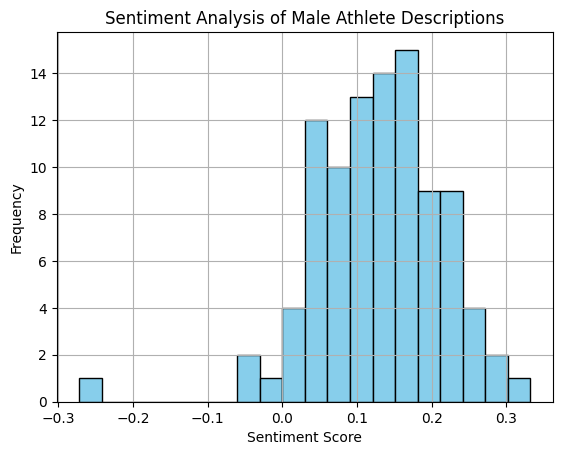

In [583]:
import matplotlib.pyplot as plt

plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Male Athlete Descriptions')
plt.grid(True)
plt.show()

In [584]:
import statistics
average_sentiment = statistics.mean(sentiments)
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.1286235628007184


## Sentiment analysis on every row of Description column labelled as Female

In [585]:
# Filter rows where 'Gender' is 'Female'
female_descriptions = data_to_analyse[data_to_analyse['Gender'] == 'female']['Complete Article']

# Perform sentiment analysis
sentiments = []
for description in female_descriptions:
    analysis = TextBlob(description)
    # Get the sentiment polarity (ranges from -1 to 1)
    sentiment_polarity = analysis.sentiment.polarity
    sentiments.append(sentiment_polarity)

# Create a new column 'Sentiment' in the original DataFrame for male descriptions
data_to_analyse.loc[data_to_analyse['Gender'] == 'female', 'Sentiment Score'] = sentiments

# Display the DataFrame with the Sentiment column for male descriptions
print(data_to_analyse[data_to_analyse['Gender'] == 'female'][['Complete Article', 'Sentiment Score']])

                                      Complete Article  Sentiment Score
0    bbc factual announces six names that meet mult...         0.156893
1    lr craig revel horwood shirley ballas motsi ma...         0.303285
2    tea may have some complicated connotations but...         0.181054
3    a teenager from north london is creating the f...         0.000000
4    james wakibiasopa imageslightrocket via getty ...         0.171354
..                                                 ...              ...
245  in a statement world athletics said it became ...         0.097697
246  advertisementthere are currently no transgende...         0.128773
247  there are currently no transgender athletes co...         0.128773
248  in these circumstances the council decided to ...         0.099095
249  a commonwealth games athlete is set to become ...         0.116667

[154 rows x 2 columns]


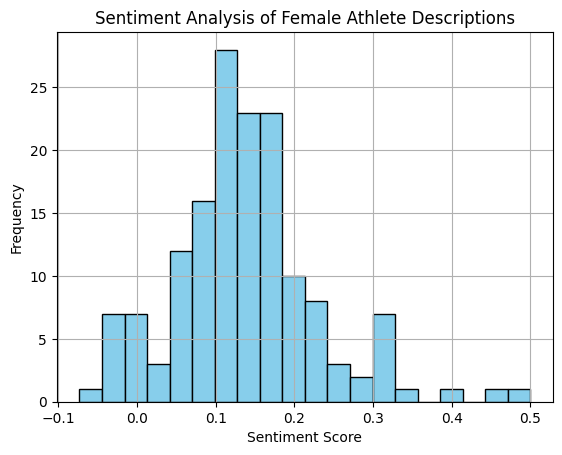

In [586]:
plt.hist(sentiments, bins=20, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Sentiment Analysis of Female Athlete Descriptions')
plt.grid(True)
plt.show()

In [587]:
import statistics
average_sentiment = statistics.mean(sentiments)
print(f'Average Sentiment Score: {average_sentiment}')

Average Sentiment Score: 0.13757472550936628


<hr><hr>

### Removing publication date & \n from all the articles

In [590]:
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.replace("publication date", " ")
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.replace("\n", " ")

# Display the modified DataFrame
print(data_to_analyse['Complete Article'])


0      bbc factual announces six names that meet mult...
1      lr craig revel horwood shirley ballas motsi ma...
2      tea may have some complicated connotations but...
3      a teenager from north london is creating the f...
4      james wakibiasopa imageslightrocket via getty ...
                             ...                        
246    advertisementthere are currently no transgende...
247    there are currently no transgender athletes co...
248    in these circumstances the council decided to ...
249    a commonwealth games athlete is set to become ...
250    jade burdens bid for a licence has been approv...
Name: Complete Article, Length: 251, dtype: object


### Removing unnecessary spaces from Complete Article column

In [591]:
data_to_analyse['Complete Article'] = data_to_analyse['Complete Article'].str.strip()

# Display the modified DataFrame
print(data_to_analyse['Complete Article'])


0      bbc factual announces six names that meet mult...
1      lr craig revel horwood shirley ballas motsi ma...
2      tea may have some complicated connotations but...
3      a teenager from north london is creating the f...
4      james wakibiasopa imageslightrocket via getty ...
                             ...                        
246    advertisementthere are currently no transgende...
247    there are currently no transgender athletes co...
248    in these circumstances the council decided to ...
249    a commonwealth games athlete is set to become ...
250    jade burdens bid for a licence has been approv...
Name: Complete Article, Length: 251, dtype: object


<hr>

#### Compare Article Frequencies Based on Genders: Compare the frequency of articles for different genders.

In [601]:
gender_article_counts = data_to_analyse.groupby('Gender').size()
print(gender_article_counts)

Gender
female    154
male       97
dtype: int64


#### Balancing the dataset by downsampling the 'female' class to match the count of the 'male' class.

In [602]:
# Separate 'female' and 'male' rows
female_df = data_to_analyse[data_to_analyse['Gender'] == 'female']
male_df = data_to_analyse[data_to_analyse['Gender'] == 'male']

# Downsample 'female' to match the count of 'male'
female_downsampled = female_df.sample(n=len(male_df), random_state=42)

# Concatenate the downsampled 'female' and 'male' dataframes
balanced_df = pd.concat([female_downsampled, male_df])

In [603]:
balanced_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 194 entries, 22 to 250
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Headline                   194 non-null    object 
 1   Complete Article           194 non-null    object 
 2   Processed Article          194 non-null    object 
 3   Processed Article Content  194 non-null    object 
 4   Gender                     194 non-null    object 
 5   Sentiment Score            194 non-null    float64
dtypes: float64(1), object(5)
memory usage: 10.6+ KB


In [604]:
male_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 11 to 250
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Headline                   97 non-null     object 
 1   Complete Article           97 non-null     object 
 2   Processed Article          97 non-null     object 
 3   Processed Article Content  97 non-null     object 
 4   Gender                     97 non-null     object 
 5   Sentiment Score            97 non-null     float64
dtypes: float64(1), object(5)
memory usage: 5.3+ KB


In [605]:
female_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 154 entries, 0 to 249
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Headline                   154 non-null    object 
 1   Complete Article           154 non-null    object 
 2   Processed Article          154 non-null    object 
 3   Processed Article Content  154 non-null    object 
 4   Gender                     154 non-null    object 
 5   Sentiment Score            154 non-null    float64
dtypes: float64(1), object(5)
memory usage: 8.4+ KB


In [606]:
female_downsampled.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 22 to 220
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Headline                   97 non-null     object 
 1   Complete Article           97 non-null     object 
 2   Processed Article          97 non-null     object 
 3   Processed Article Content  97 non-null     object 
 4   Gender                     97 non-null     object 
 5   Sentiment Score            97 non-null     float64
dtypes: float64(1), object(5)
memory usage: 5.3+ KB


In [607]:
gender_distribution = balanced_df['Gender'].value_counts()
print(gender_distribution)

Gender
female    97
male      97
Name: count, dtype: int64


In [608]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Processed Article',
       'Processed Article Content', 'Gender', 'Sentiment Score'],
      dtype='object')

In [611]:
balanced_df.head()

,Headline,Complete Article,Processed Article,Processed Article Content,Gender,Sentiment Score
22,title should you trust personal finance advice...,when yasmin purnell started blogging in she p...,"[101, 100, 100, 131, 9707, 8152, 118, 8141, 11...",: 2023 - 09 - 15 00 : 00 : 00 started blogging...,female,0.139922
168,title video bray wyatt terry funk honored by w...,alex bierens de haangetty images wwe paid tri...,"[101, 100, 100, 8363, 100, 120, 100, 100, 100,...",de / paid tribute to two wrestling legends dur...,female,0.158333
248,naomi osaka slams people asking her to maintai...,in these circumstances the council decided to ...,"[101, 107, 100, 8174, 8417, 12364, 10227, 8545...",""" these circumstances, the decided to prioriti...",female,0.099095
189,title this is my motivation this is my inspira...,as we near the september th fight date for can...,"[101, 100, 100, 131, 9707, 8152, 118, 8141, 11...",: 2023 - 09 - 18 00 : 00 : 00 we near the 30th...,female,0.080848
196,title nobody wants to fight andy ruiz jr says ...,andy ruiz jr hasnt fought in just over a year ...,"[101, 100, 100, 131, 9707, 8152, 118, 8141, 11...",: 2023 - 09 - 16 00 : 00 : 00 hasn t fought in...,female,0.157917


### Dropping unnecessary columns from balanced_df

In [612]:
columns_to_drop_from_balanced_df = ['Processed Article', 'Processed Article Content']
balanced_df.drop(columns = columns_to_drop_from_balanced_df, inplace=True)

In [614]:
balanced_df.head()

,Headline,Complete Article,Gender,Sentiment Score
22,title should you trust personal finance advice...,when yasmin purnell started blogging in she p...,female,0.139922
168,title video bray wyatt terry funk honored by w...,alex bierens de haangetty images wwe paid tri...,female,0.158333
248,naomi osaka slams people asking her to maintai...,in these circumstances the council decided to ...,female,0.099095
189,title this is my motivation this is my inspira...,as we near the september th fight date for can...,female,0.080848
196,title nobody wants to fight andy ruiz jr says ...,andy ruiz jr hasnt fought in just over a year ...,female,0.157917


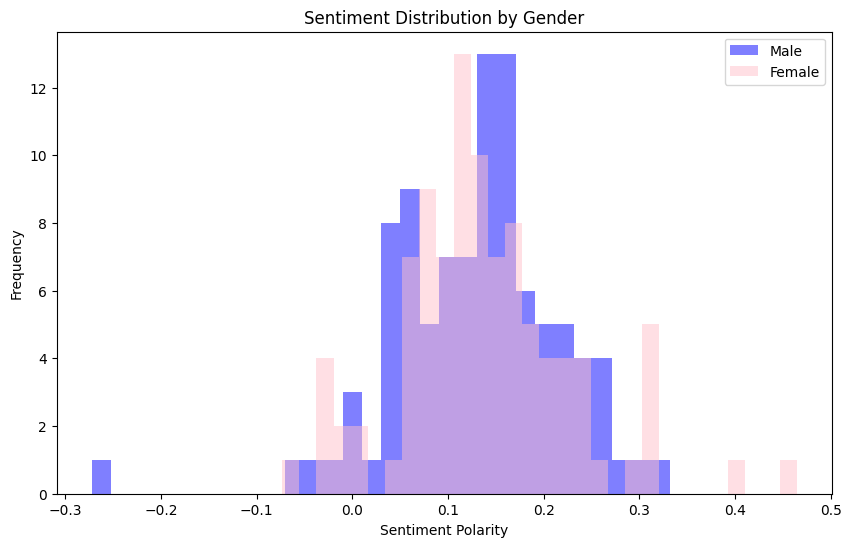

In [615]:
# Filter the DataFrame for 'male' and 'female' genders
male_sentiments = balanced_df[balanced_df['Gender'] == 'male']['Sentiment Score']
female_sentiments = balanced_df[balanced_df['Gender'] == 'female']['Sentiment Score']

# Create separate histograms for 'male' and 'female' sentiments
plt.figure(figsize=(10, 6))

plt.hist(male_sentiments, bins=30, alpha=0.5, color='blue', label='Male')
plt.hist(female_sentiments, bins=30, alpha=0.5, color='pink', label='Female')

plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Gender')
plt.legend()
plt.show()

In [620]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Gender', 'Sentiment Score'], dtype='object')

### Dropped previous sentiment score as it was calculated without removing publication date string & \n from the content of Complete Article column

In [621]:
balanced_df.drop(columns=['Sentiment Score'], inplace=True)
balanced_df.head()

,Headline,Complete Article,Gender
22,title should you trust personal finance advice...,when yasmin purnell started blogging in she p...,female
168,title video bray wyatt terry funk honored by w...,alex bierens de haangetty images wwe paid tri...,female
248,naomi osaka slams people asking her to maintai...,in these circumstances the council decided to ...,female
189,title this is my motivation this is my inspira...,as we near the september th fight date for can...,female
196,title nobody wants to fight andy ruiz jr says ...,andy ruiz jr hasnt fought in just over a year ...,female


## Sentiment score & Sentiment labels on the content of Complete Article column containing the articles with publication date & \n string removed from them

In [622]:
from textblob import TextBlob

# Function to perform sentiment analysis and return score with corresponding label
def analyze_sentiment(article):
    analysis = TextBlob(article)
    score = analysis.sentiment.polarity
    # Assigning sentiment label based on the score
    if score > 0:
        score_meaning = 'Positive'
    elif score < 0:
        score_meaning = 'Negative'
    else:
        score_meaning = 'Neutral'
    return score, score_meaning

# Apply sentiment analysis function to each row in the 'Complete Article' column
balanced_df['Sentiment Score'], balanced_df['Sentiment Label'] = zip(*balanced_df['Complete Article'].apply(analyze_sentiment))


In [623]:
balanced_df.head()

,Headline,Complete Article,Gender,Sentiment Score,Sentiment Label
22,title should you trust personal finance advice...,when yasmin purnell started blogging in she p...,female,0.139922,Positive
168,title video bray wyatt terry funk honored by w...,alex bierens de haangetty images wwe paid tri...,female,0.158333,Positive
248,naomi osaka slams people asking her to maintai...,in these circumstances the council decided to ...,female,0.099095,Positive
189,title this is my motivation this is my inspira...,as we near the september th fight date for can...,female,0.080848,Positive
196,title nobody wants to fight andy ruiz jr says ...,andy ruiz jr hasnt fought in just over a year ...,female,0.157917,Positive


In [624]:
balanced_df['Sentiment Label'].value_counts()

Sentiment Label
Positive    182
Negative     11
Neutral       1
Name: count, dtype: int64

In [625]:
balanced_df[balanced_df['Gender']=='male']['Sentiment Label'].value_counts()

Sentiment Label
Positive    92
Negative     4
Neutral      1
Name: count, dtype: int64

In [626]:
balanced_df[balanced_df['Gender']=='female']['Sentiment Label'].value_counts()

Sentiment Label
Positive    90
Negative     7
Name: count, dtype: int64

### Sentiment score graph (male & female athletes articles combined) for balanced_df dataset

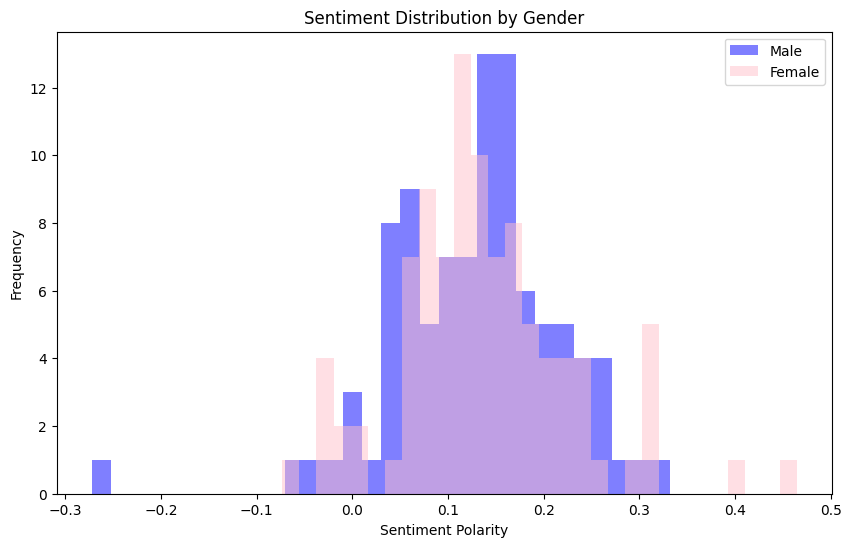

In [628]:
# Filter the DataFrame for 'male' and 'female' genders
male_sentiments = balanced_df[balanced_df['Gender'] == 'male']['Sentiment Score']
female_sentiments = balanced_df[balanced_df['Gender'] == 'female']['Sentiment Score']

# Create separate histograms for 'male' and 'female' sentiments
plt.figure(figsize=(10, 6))

plt.hist(male_sentiments, bins=30, alpha=0.5, color='blue', label='Male')
plt.hist(female_sentiments, bins=30, alpha=0.5, color='pink', label='Female')

plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Distribution by Gender')
plt.legend()
plt.show()


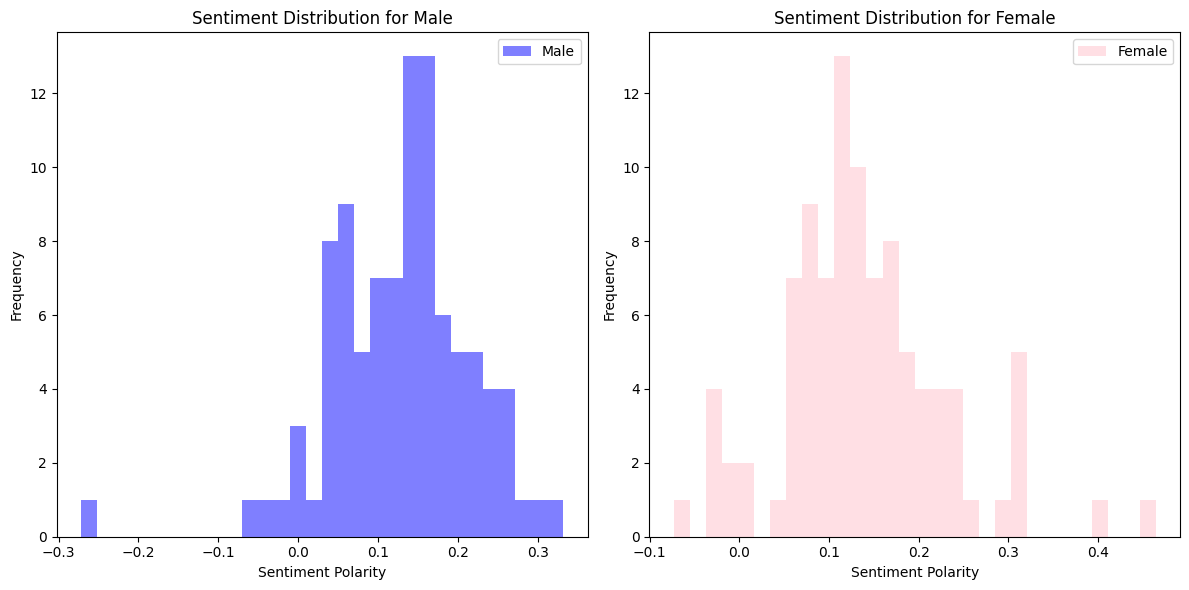

In [629]:
import matplotlib.pyplot as plt

# Filter the DataFrame for 'male' and 'female' genders
male_sentiments = balanced_df[balanced_df['Gender'] == 'male']['Sentiment Score']
female_sentiments = balanced_df[balanced_df['Gender'] == 'female']['Sentiment Score']

# Create separate subplots for 'male' and 'female' sentiments
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot histogram for 'male' sentiments
axes[0].hist(male_sentiments, bins=30, alpha=0.5, color='blue', label='Male')
axes[0].set_xlabel('Sentiment Polarity')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Sentiment Distribution for Male')
axes[0].legend()

# Plot histogram for 'female' sentiments
axes[1].hist(female_sentiments, bins=30, alpha=0.5, color='pink', label='Female')
axes[1].set_xlabel('Sentiment Polarity')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Sentiment Distribution for Female')
axes[1].legend()

plt.tight_layout()
plt.show()


### Range of sentiment scores for male & female articles

In [630]:
# Filter the DataFrame for 'male' and 'female' genders
male_articles = balanced_df[balanced_df['Gender'] == 'male']
female_articles = balanced_df[balanced_df['Gender'] == 'female']

# Find the range of values for male articles' sentiment scores
min_sentiment_male = male_articles['Sentiment Score'].min()
max_sentiment_male = male_articles['Sentiment Score'].max()
range_sentiment_male = max_sentiment_male - min_sentiment_male

# Find the range of values for female articles' sentiment scores
min_sentiment_female = female_articles['Sentiment Score'].min()
max_sentiment_female = female_articles['Sentiment Score'].max()
range_sentiment_female = max_sentiment_female - min_sentiment_female

print(f"Range of sentiment scores for male articles: {min_sentiment_male} to {max_sentiment_male} (Range: {range_sentiment_male})")
print(f"Range of sentiment scores for female articles: {min_sentiment_female} to {max_sentiment_female} (Range: {range_sentiment_female})")

Range of sentiment scores for male articles: -0.2718531468531468 to 0.33205128205128204 (Range: 0.6039044289044289)
Range of sentiment scores for female articles: -0.07333333333333333 to 0.46436067019400357 (Range: 0.5376940035273369)


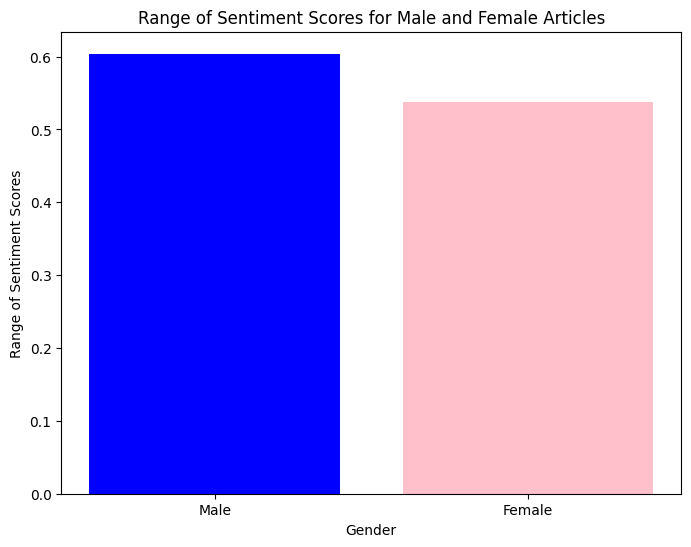

In [632]:
import matplotlib.pyplot as plt

# Values for male and female articles
ranges = [range_sentiment_male, range_sentiment_female]
genders = ['Male', 'Female']

# Create a bar graph
plt.figure(figsize=(8, 6))
plt.bar(genders, ranges, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Range of Sentiment Scores')
plt.title('Range of Sentiment Scores for Male and Female Articles')
plt.show()

### Pie chart for showing the proportion of different kind of sentiments in the male athletes articles

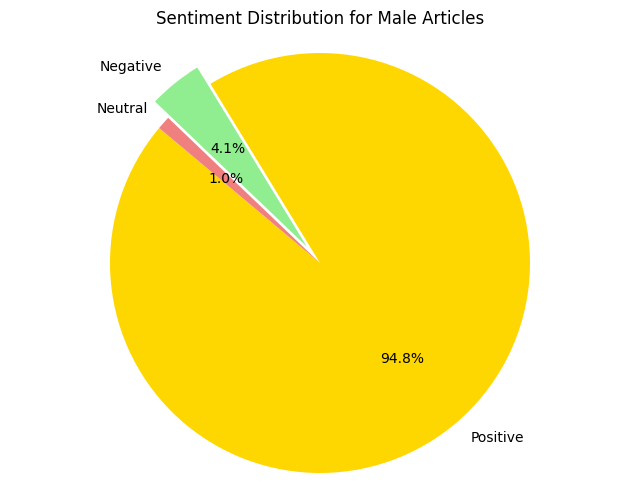

In [634]:
import matplotlib.pyplot as plt

# Filter the DataFrame for 'male' gender
male_articles = balanced_df[balanced_df['Gender'] == 'male']

# Get sentiments for male articles
male_sentiments = male_articles['Sentiment Label'].value_counts()

# Plotting the pie chart
labels = male_sentiments.index
sizes = male_sentiments.values
colors = ['gold', 'lightgreen', 'lightcoral']
explode = (0, 0.1, 0)  # Explode the 'Positive' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Male Articles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Pie chart for showing the proportion of different kind of sentiments in the female athletes articles

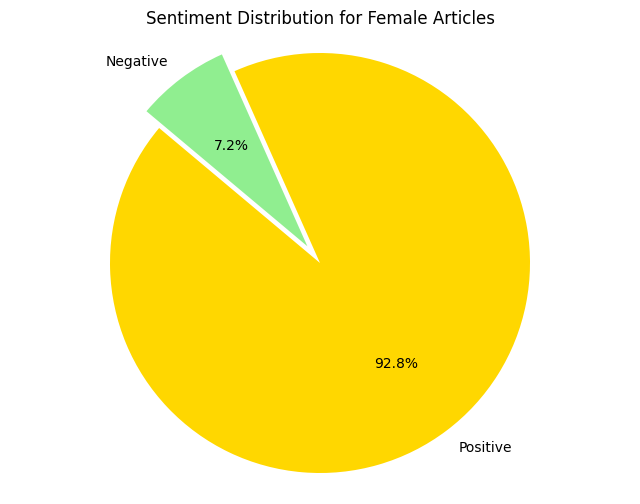

In [637]:
import matplotlib.pyplot as plt

# Filter the DataFrame for 'female' gender
female_articles = balanced_df[balanced_df['Gender'] == 'female']

# Get sentiments for female articles
female_sentiments = female_articles['Sentiment Label'].value_counts()

# Plotting the pie chart
labels = female_sentiments.index
sizes = female_sentiments.values
colors = ['gold', 'lightgreen', 'lightcoral']
explode = (0, 0.1)  # Explode the 'Positive' slice

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Female Articles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


### Removing stopwords from balanced_df before doing topic modelling & measuring word frequencies & saving the articles content without stopwords in a new column

In [641]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

# Function to remove stopwords
def remove_stopwords(text):
    stop_words = set(stopwords.words('english'))
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the remove_stopwords function to 'Complete Article' column
balanced_df['Complete Article Without Stopwords'] = balanced_df['Complete Article'].apply(remove_stopwords)

# Display the updated DataFrame
print(balanced_df[['Complete Article', 'Complete Article Without Stopwords']])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMOLP094\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                      Complete Article  \
22   when yasmin purnell started blogging in  she p...   
168  alex bierens de haangetty images  wwe paid tri...   
248  in these circumstances the council decided to ...   
189  as we near the september th fight date for can...   
196  andy ruiz jr hasnt fought in just over a year ...   
..                                                 ...   
210  by sean crose  talk about having confidence to...   
212  by sean crose  numerous outlets are reporting ...   
213  by sean crose  those looking to see a heavywei...   
224  raipur chhattisgarh has become the overall cha...   
250  jade burdens bid for a licence has been approv...   

                    Complete Article Without Stopwords  
22   yasmin purnell started blogging planned share ...  
168  alex bierens de haangetty images wwe paid trib...  
248  circumstances council decided prioritise fairn...  
189  near september th fight date canelo alvarez vs...  
196  andy ruiz jr 

In [642]:
balanced_df.head()

,Headline,Complete Article,Gender,Sentiment Score,Sentiment Label,Complete Article Without Stopwords
22,title should you trust personal finance advice...,when yasmin purnell started blogging in she p...,female,0.139922,Positive,yasmin purnell started blogging planned share ...
168,title video bray wyatt terry funk honored by w...,alex bierens de haangetty images wwe paid tri...,female,0.158333,Positive,alex bierens de haangetty images wwe paid trib...
248,naomi osaka slams people asking her to maintai...,in these circumstances the council decided to ...,female,0.099095,Positive,circumstances council decided prioritise fairn...
189,title this is my motivation this is my inspira...,as we near the september th fight date for can...,female,0.080848,Positive,near september th fight date canelo alvarez vs...
196,title nobody wants to fight andy ruiz jr says ...,andy ruiz jr hasnt fought in just over a year ...,female,0.157917,Positive,andy ruiz jr hasnt fought year winning narrow ...


In [643]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Gender', 'Sentiment Score',
       'Sentiment Label', 'Complete Article Without Stopwords'],
      dtype='object')

### Word Frequencies for male & female athletes articles from Complete Article Without Stopwords column

In [645]:
from collections import Counter

# Separate 'male' and 'female' rows
male_articles = balanced_df[balanced_df['Gender'] == 'male']['Complete Article Without Stopwords']
female_articles = balanced_df[balanced_df['Gender'] == 'female']['Complete Article Without Stopwords']

# Function to count word frequencies
def count_word_freq(articles):
    words = [word for article in articles for word in article.split()]
    return Counter(words)

# Calculate word frequencies for 'male' and 'female' articles
word_freq_male = count_word_freq(male_articles)
word_freq_female = count_word_freq(female_articles)

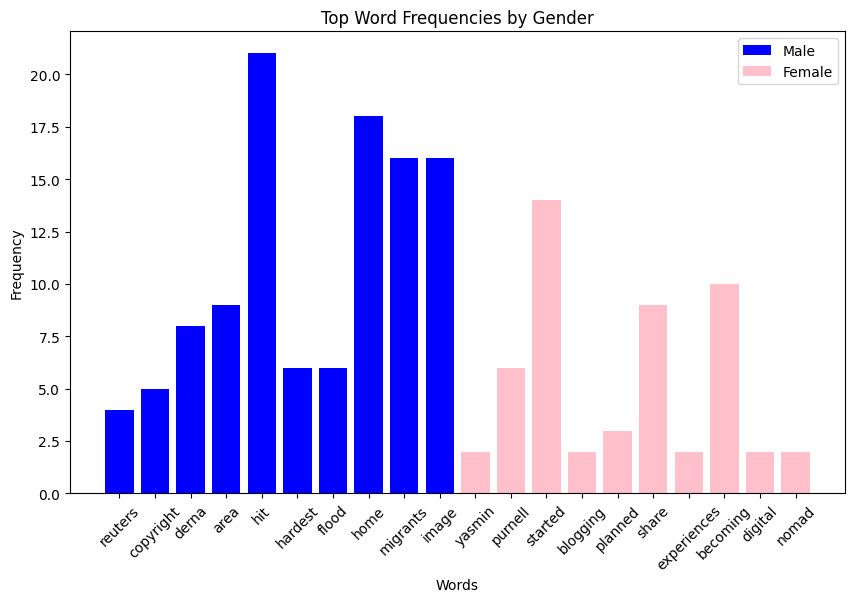

In [646]:
words_male = list(word_freq_male.keys())[:10]  # Select top 10 words
words_female = list(word_freq_female.keys())[:10]  # Select top 10 words
freq_male = list(word_freq_male.values())[:10]  # Select top 10 frequencies
freq_female = list(word_freq_female.values())[:10]  # Select top 10 frequencies

plt.figure(figsize=(10, 6))
plt.bar(words_male, freq_male, label='Male', color='blue')
plt.bar(words_female, freq_female, label='Female', color='pink')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top Word Frequencies by Gender')
plt.legend()
plt.xticks(rotation=45)
plt.show()


### Topic Modelling on the content in the Complete Article Without Stopwords column from balanced_df

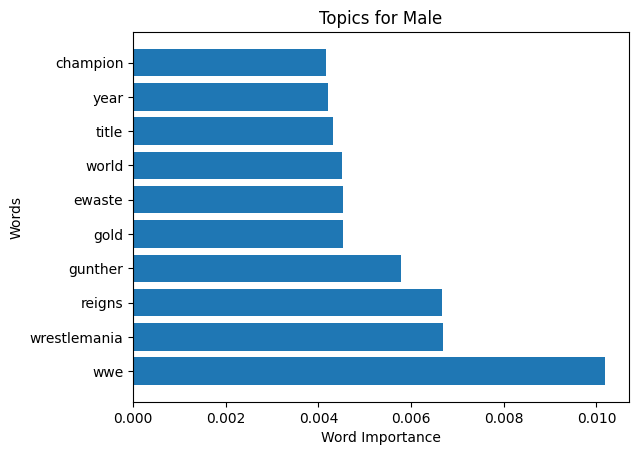

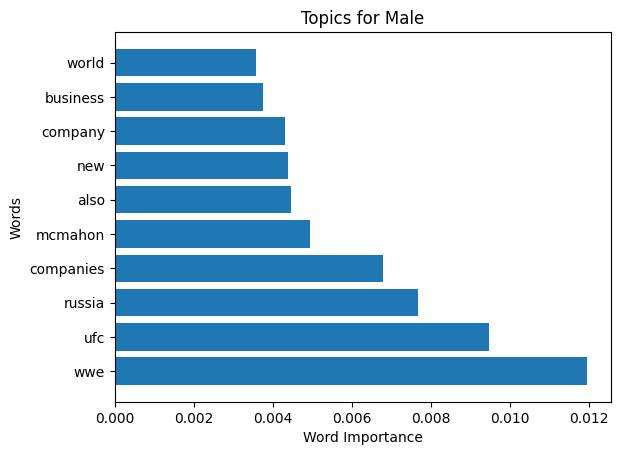

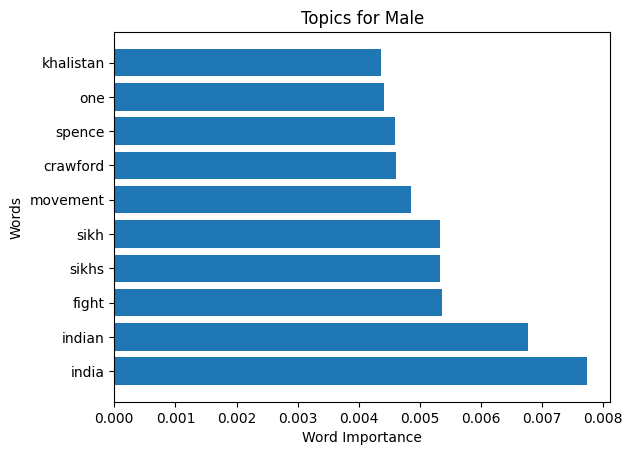

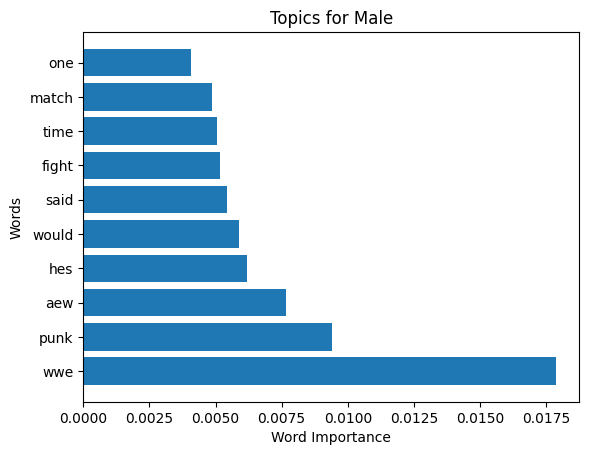

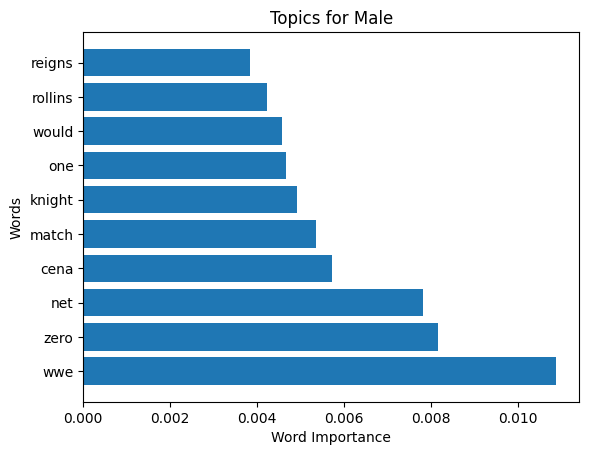

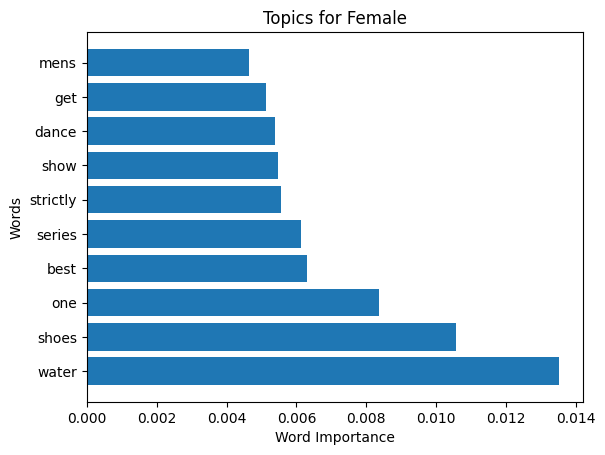

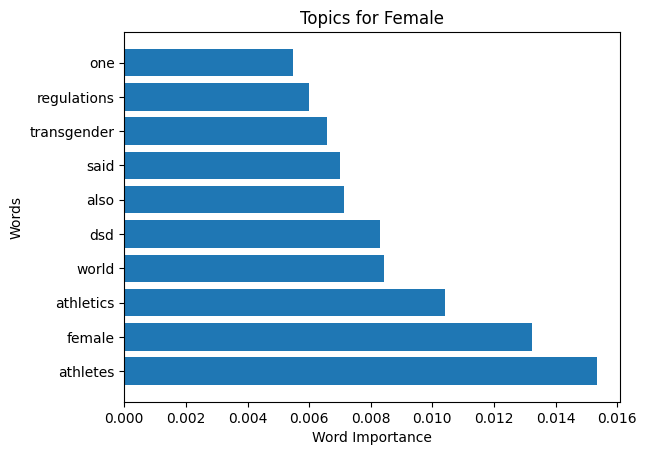

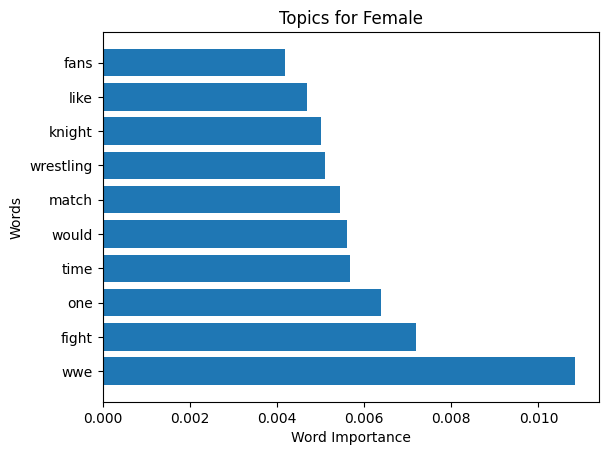

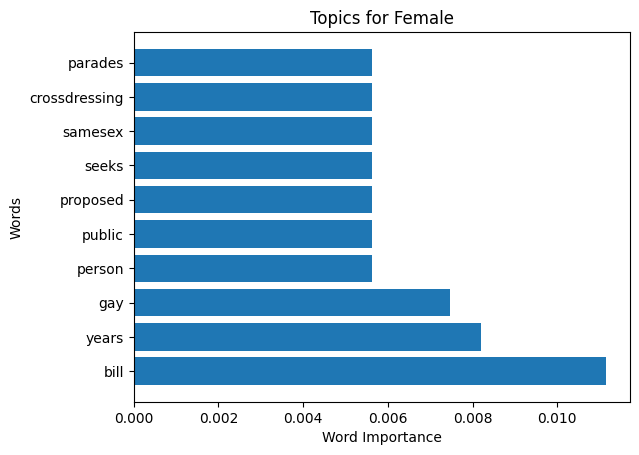

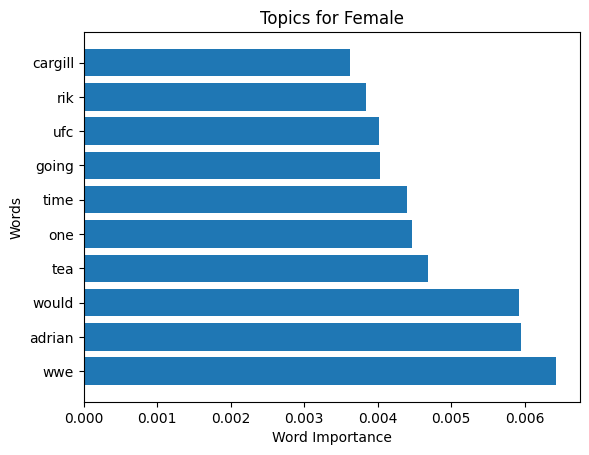

In [647]:
from gensim import corpora, models
import matplotlib.pyplot as plt

# Separate 'male' and 'female' rows
male_texts = balanced_df[balanced_df['Gender'] == 'male']['Complete Article Without Stopwords'].apply(lambda x: x.split())
female_texts = balanced_df[balanced_df['Gender'] == 'female']['Complete Article Without Stopwords'].apply(lambda x: x.split())

# Create dictionary and corpus for 'male' and 'female'
male_dictionary = corpora.Dictionary(male_texts)
male_corpus = [male_dictionary.doc2bow(text) for text in male_texts]

female_dictionary = corpora.Dictionary(female_texts)
female_corpus = [female_dictionary.doc2bow(text) for text in female_texts]

# Apply LDA for 'male' and 'female'
num_topics = 5  # Number of topics
passes = 15  # Number of passes
lda_model_male = models.LdaModel(male_corpus, num_topics=num_topics, id2word=male_dictionary, passes=passes)
lda_model_female = models.LdaModel(female_corpus, num_topics=num_topics, id2word=female_dictionary, passes=passes)

# Visualize topics for 'male' and 'female'
topics_male = lda_model_male.show_topics(num_topics=num_topics, num_words=10, formatted=False)
topics_female = lda_model_female.show_topics(num_topics=num_topics, num_words=10, formatted=False)

# Plotting topics for 'male' and 'female'
def plot_topics(topics, title):
    for idx, topic in topics:
        words = [word for word, _ in topic]
        weights = [weight for _, weight in topic]
        plt.barh(range(len(words)), weights, tick_label=words)
        plt.title(title)
        plt.xlabel('Word Importance')
        plt.ylabel('Words')
        plt.show()

plot_topics(topics_male, 'Topics for Male')
plot_topics(topics_female, 'Topics for Female')


### Pronouns analysis

In [648]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Gender', 'Sentiment Score',
       'Sentiment Label', 'Complete Article Without Stopwords'],
      dtype='object')

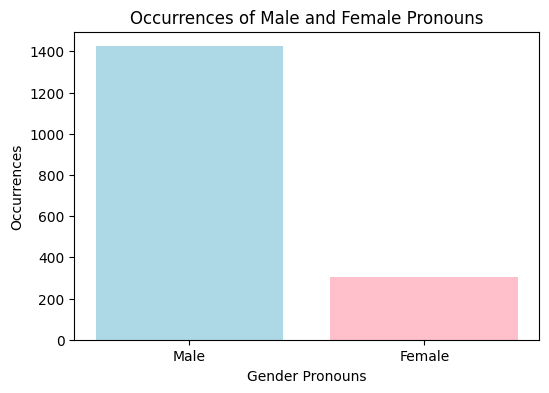

In [649]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define patterns for male and female pronouns
male_pronouns = ['he', 'him', 'his', 'himself']
female_pronouns = ['she', 'her', 'hers', 'herself']

# Function to count occurrences of male and female pronouns
def count_pronouns(text):
    male_count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(male_pronouns), text.lower()))
    female_count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(female_pronouns), text.lower()))
    return male_count, female_count

# Apply function to the 'Cleaned_Content' column
balanced_df[['Male_Count', 'Female_Count']] = balanced_df['Complete Article'].apply(lambda x: pd.Series(count_pronouns(x)))

# Sum up total counts
total_male_count = balanced_df['Male_Count'].sum()
total_female_count = balanced_df['Female_Count'].sum()

# Plotting the bar graph
plt.figure(figsize=(6, 4))
plt.bar(['Male', 'Female'], [total_male_count, total_female_count], color=['lightblue', 'pink'])
plt.title('Occurrences of Male and Female Pronouns')
plt.xlabel('Gender Pronouns')
plt.ylabel('Occurrences')
plt.show()

### Occurrence of particular words related to male & female athletes

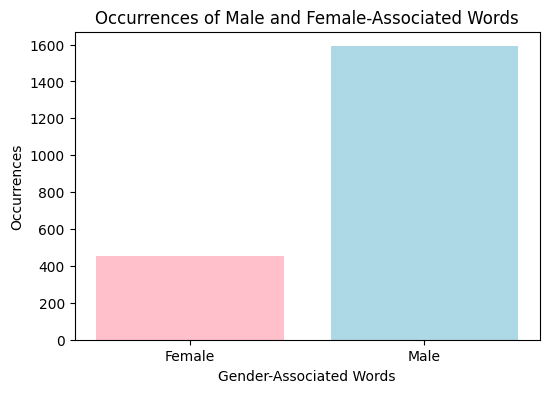

In [650]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define extensive lists of male and female-associated words
female_words = [
    'she', 'her', 'hers', 'herself', 'woman', 'women', 'girl', 'lady', 'feminine',
    'females', 'girls', 'female athlete', 'female athletes', 'women athlete',
    'women athletes', 'sportswoman', 'sportswomen', 'athlete', 'sportsperson',
    'gymnast', 'swimmer', 'runner', 'tennis player', 'footballer', 'basketball player',
    'volleyball player', 'skater', 'diver', 'golfer', 'cyclist', 'hockey player',
    'athletics', 'sprinter', 'javelin thrower', 'long jumper', 'high jumper',
    'pole vaulter', 'shot putter', 'triple jumper', 'racewalker', 'heptathlete'
]

male_words = [
    'he', 'him', 'his', 'himself', 'man', 'men', 'boy', 'masculine', 'males', 'boys',
    'male athlete', 'male athletes', 'men athlete', 'men athletes', 'sportsman',
    'sportsmen', 'athlete', 'sportsperson', 'gymnast', 'swimmer', 'runner',
    'tennis player', 'footballer', 'basketball player', 'volleyball player',
    'skater', 'diver', 'golfer', 'cyclist', 'hockey player', 'athletics',
    'sprinter', 'javelin thrower', 'long jumper', 'high jumper', 'pole vaulter',
    'shot putter', 'triple jumper', 'racewalker', 'decathlete'
]

# Function to count occurrences of male and female-associated words
def count_gender_words(text, gender_words):
    count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(gender_words), text.lower()))
    return count

# Apply function to count male and female words in 'Article'
balanced_df['Female_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_gender_words(x, female_words))
balanced_df['Male_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_gender_words(x, male_words))

# Total counts of male and female-associated words
total_female_count = balanced_df['Female_Word_Count'].sum()
total_male_count = balanced_df['Male_Word_Count'].sum()

# Plotting the bar graph
plt.figure(figsize=(6, 4))
plt.bar(['Female', 'Male'], [total_female_count, total_male_count], color=['pink', 'lightblue'])
plt.title('Occurrences of Male and Female-Associated Words')
plt.xlabel('Gender-Associated Words')
plt.ylabel('Occurrences')
plt.show()

### Occurrence of stereotypical words related to males & females

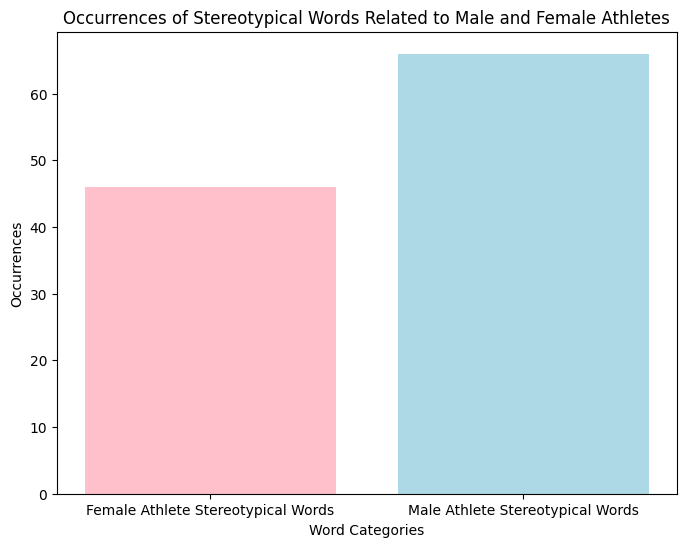

In [651]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define updated lists of stereotypical words related to male and female athletes
female_athlete_stereotypical_words = [
    'graceful', 'elegant', 'determined', 'talented', 'showcased her skills', 'outstanding',
    'athleticism', 'effortless', 'dedicated', 'grit', 'passionate', 'skillful', 'remarkable',
    'flexible', 'agile', 'slender', 'nimble', 'lithe', 'lean', 'resilient', 'tenacious',
    'focused', 'driven', 'gymnast', 'dancer', 'swimmer', 'runner', 'skater',
    'volleyball player', 'tennis player', 'soccer player', 'basketball player',
    'graceful movements', 'finesse', 'technique', 'precision', 'endurance', 'flexibility'
]

male_athlete_stereotypical_words = [
    'strong', 'powerful', 'exceptional', 'skilled', 'showcased his skills', 'outstanding',
    'athleticism', 'effortless', 'dedicated', 'grit', 'passionate', 'skillful', 'remarkable',
    'powerful', 'muscular', 'robust', 'sturdy', 'brawny', 'resilient', 'tenacious',
    'focused', 'driven', 'gymnast', 'swimmer', 'runner', 'sprinter',
    'basketball player', 'soccer player', 'footballer', 'wrestler',
    'raw power', 'strength', 'speed', 'agility', 'explosiveness', 'athleticism'
]

# Function to count occurrences of stereotypical words for male and female athletes
def count_stereotypical_words(text, word_list):
    count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(word_list), text.lower()))
    return count

# Apply function to count stereotypical words for male and female athletes in 'Article'
balanced_df['Female_Athlete_Stereotypical_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_stereotypical_words(x, female_athlete_stereotypical_words))
balanced_df['Male_Athlete_Stereotypical_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_stereotypical_words(x, male_athlete_stereotypical_words))

# Total counts of stereotypical words for male and female athletes
total_female_athlete_stereotypical_count = balanced_df['Female_Athlete_Stereotypical_Word_Count'].sum()
total_male_athlete_stereotypical_count = balanced_df['Male_Athlete_Stereotypical_Word_Count'].sum()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
plt.bar(['Female Athlete Stereotypical Words', 'Male Athlete Stereotypical Words'],
        [total_female_athlete_stereotypical_count, total_male_athlete_stereotypical_count],
        color=['pink', 'lightblue'])
plt.title('Occurrences of Stereotypical Words Related to Male and Female Athletes')
plt.xlabel('Word Categories')
plt.ylabel('Occurrences')
plt.show()


### Occurrence of few more stereotypical words & words denoting bias in the articles

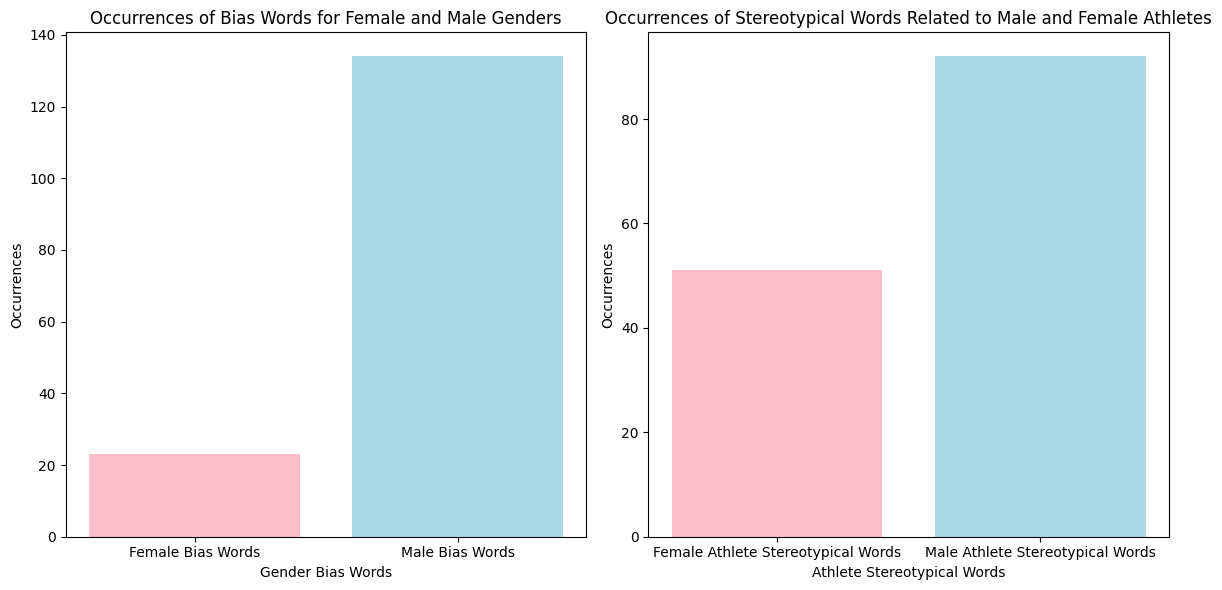

In [652]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Define updated lists of words related to bias for female and male genders
female_bias_words = [
    'woman', 'girl', 'emotional', 'weak', 'sensitive', 'beautiful', 'attractive', 'dramatic', 'bossy',
    'nurturing', 'compassionate', 'submissive', 'dependent', 'fragile', 'gentle', 'hysterical', 'moody',
    'irrational', 'indecisive', 'gossipy', 'manipulative', 'needy', 'vain', 'overemotional', 'caretaker',
    'fragile', 'hormonal', 'ditsy', 'irresponsible', 'motherly', 'overly attached', 'passive-aggressive',
    'princess', 'drama queen', 'airhead', 'diva'
]

male_bias_words = [
    'strong', 'leader', 'aggressive', 'tough', 'breadwinner', 'provider', 'man', 'dominant',
    'rational', 'logical', 'independent', 'assertive', 'competitive', 'confident', 'decisive', 'ambitious',
    'masculine', 'stoic', 'reckless', 'macho', 'insensitive', 'chauvinist', 'daring', 'domineering', 'fearless',
    'reckless', 'aloof', 'self-reliant', 'unemotional', 'rugged', 'alpha male', 'player', 'womanizer', 'stud',
    'cocky', 'egotistical', 'machismo'
]

# Define updated lists of stereotypical words related to male and female athletes
female_athlete_stereotypical_words = [
    'graceful', 'elegant', 'talented', 'outstanding', 'athleticism', 'dedicated', 'passionate',
    'flexible', 'agile', 'slender', 'nimble', 'lean', 'resilient', 'focused', 'driven', 'gymnast',
    'dancer', 'swimmer', 'runner', 'skater', 'volleyball', 'tennis', 'soccer', 'basketball', 'technique',
    'precision', 'endurance', 'flexibility', 'grace', 'poised', 'lithe', 'nimble', 'elegant', 'aesthetic',
    'aerobic', 'musical', 'articulate', 'expressive', 'graceful', 'rhythmic', 'delicate', 'flowing'
]

male_athlete_stereotypical_words = [
    'strong', 'skilled', 'outstanding', 'athleticism', 'dedicated', 'passionate',
    'powerful', 'muscular', 'robust', 'sturdy', 'resilient', 'focused', 'driven', 'gymnast',
    'swimmer', 'runner', 'sprinter', 'basketball', 'soccer', 'footballer', 'technique',
    'precision', 'endurance', 'stalwart', 'tough', 'rugged', 'aggressive', 'competitive', 'masculine',
    'powerful', 'dominant', 'virile', 'forceful', 'macho', 'victorious', 'fearless', 'unstoppable',
    'commanding', 'dominating', 'confident', 'determined', 'bold', 'heroic', 'daring', 'strong-willed'
]

# Function to count occurrences of bias words for female and male genders
def count_bias_words(text, word_list):
    count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(word_list), text.lower()))
    return count

# Function to count occurrences of stereotypical words for male and female athletes
def count_stereotypical_words(text, word_list):
    count = sum(1 for word in re.findall(r'\b(?:%s)\b' % '|'.join(word_list), text.lower()))
    return count

# Apply functions to count bias words for female and male genders in 'Complete Article'
balanced_df['Female_Bias_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_bias_words(x, female_bias_words))
balanced_df['Male_Bias_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_bias_words(x, male_bias_words))

# Apply functions to count stereotypical words for male and female athletes in 'Complete Article'
balanced_df['Female_Athlete_Stereotypical_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_stereotypical_words(x, female_athlete_stereotypical_words))
balanced_df['Male_Athlete_Stereotypical_Word_Count'] = balanced_df['Complete Article'].apply(lambda x: count_stereotypical_words(x, male_athlete_stereotypical_words))

# Total counts of bias words for female and male genders
total_female_bias_count = balanced_df['Female_Bias_Word_Count'].sum()
total_male_bias_count = balanced_df['Male_Bias_Word_Count'].sum()

# Total counts of stereotypical words for male and female athletes
total_female_athlete_stereotypical_count = balanced_df['Female_Athlete_Stereotypical_Word_Count'].sum()
total_male_athlete_stereotypical_count = balanced_df['Male_Athlete_Stereotypical_Word_Count'].sum()

# Plotting the bar graphs
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.bar(['Female Bias Words', 'Male Bias Words'], [total_female_bias_count, total_male_bias_count], color=['pink', 'lightblue'])
plt.title('Occurrences of Bias Words for Female and Male Genders')
plt.xlabel('Gender Bias Words')
plt.ylabel('Occurrences')

plt.subplot(1, 2, 2)
plt.bar(['Female Athlete Stereotypical Words', 'Male Athlete Stereotypical Words'],
        [total_female_athlete_stereotypical_count, total_male_athlete_stereotypical_count],
        color=['pink', 'lightblue'])
plt.title('Occurrences of Stereotypical Words Related to Male and Female Athletes')
plt.xlabel('Athlete Stereotypical Words')
plt.ylabel('Occurrences')

plt.tight_layout()
plt.show()


### Athletes names occurrence in articles 

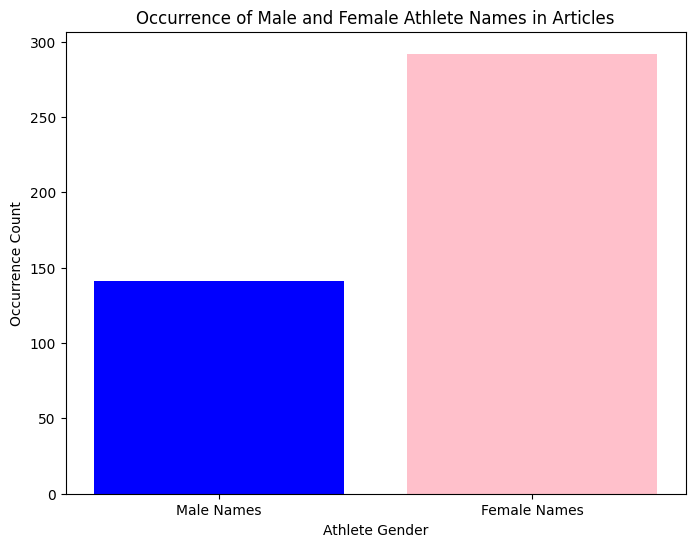

In [654]:
import pandas as pd
import matplotlib.pyplot as plt

# Define lists of male and female athlete names
male_names = [
    'Michael', 'LeBron', 'Tom', 'Lionel', 'Roger', 'Usain', 'Tiger', 'Cristiano', 'Kevin', 'Rafael', 'Stephen', 'Mohamed',
    'Luka', 'Virat', 'Conor', 'Lewis', 'Novak', 'Zlatan', 'Kobe', 'Russell', 'Neymar', 'Rafael', 'Sergio', 'Dwayne', 'Zinedine',
    'Floyd', 'Manny', 'Anthony', 'Sebastian', 'Mats', 'Gareth', 'Kylian', 'Eden', 'Andre', 'Marcelo', 'Harry', 'Sadio', 'Paul',
    'Antoine', 'Thierry', 'David', 'Wayne', 'Iker', 'Luis', 'Bryant', 'Vincent', 'NGolo', 'Franck', 'Karim', 'Bastian', 'Bobby',
    'Jerome', 'Gianluigi', 'Thomas', 'Marco', 'Javier', 'Zinedine', 'Carlo', 'Gonzalo', 'Fernando', 'Alessandro', 'Raul', 'Sergio',
    'Fabio', 'Paolo', 'Xabi', 'Alessandro', 'Gianluigi', 'Zico', 'Gennaro', 'Giacinto', 'Pavel', 'Eusebio', 'Abedi', 'Ricardo',
    'Ruud', 'Andriy', 'Gheorghe', 'Vladimir', 'George', 'Miroslav', 'Lothar', 'Hristo', 'Pavel', 'Paolo', 'Roberto', 'Petr', 'Davor',
    'Paolo', 'Samuel', 'Dejan', 'Andrea', 'Mario', 'Javier', 'Miguel', 'Oleksandr', 'Kaká', 'Branislav', 'Nwankwo', 'Alessandro',
    'Fernando', 'Eidur', 'Jan', 'Iván', 'Eidur', 'Landon', 'Cafu', 'Hernán', 'Mido', 'Jay-Jay', 'Radamel', 'Freddie', 'Faryd', 'Emile'
]

female_names = [
    'Serena', 'Simone', 'Megan', 'Alex', 'Naomi', 'Allyson', 'Lindsey', 'Carli', 'Alyssa', 'Gabrielle', 'Jessica', 'Katie', 'Marta',
    'Maria', 'Hope', 'Madison', 'Kayla', 'Amanda', 'Sydney', 'Jordan', 'Emma', 'Julie', 'Abby', 'Gina', 'Leah', 'Christine', 'Haley',
    'Rebecca', 'Allison', 'Mia', 'Lauren', 'Ellen', 'Sophie', 'Amy', 'Caroline', 'Laura', 'Brooke', 'Kendra', 'Clara', 'Morgan', 'Grace',
    'Vanessa', 'Taylor', 'Charlotte', 'Caitlin', 'Ella', 'Ashley', 'Courtney', 'Natalie', 'Rachel', 'Elizabeth', 'Hannah', 'Olivia', 'Paige',
    'Jessica', 'Nicole', 'Kelly', 'Kylie', 'Jenna', 'Alexis', 'Victoria', 'Samantha', 'Gabby', 'Marie', 'Erin', 'Zoe', 'Ava', 'Danielle',
    'Brianna', 'Kristen', 'Shelby', 'Jacqueline', 'Amber', 'Riley', 'Jasmine', 'Audrey', 'Reagan', 'Lily', 'Madeline', 'Evelyn', 'Avery',
    'Brooklyn', 'Alexandra', 'Allie', 'Sydney', 'Cassidy', 'Maya', 'Isabella', 'Holly', 'Kaitlyn', 'Kelsey', 'Grace', 'Hailey', 'Mackenzie',
    'Emily', 'Nora', 'Gabriella', 'Sophia', 'Charlotte', 'Chloe', 'Aaliyah', 'Scarlett', 'Zoey', 'Layla', 'Aria', 'Emma', 'Olivia', 'Ava',
    'Isabella', 'Sophia', 'Mia', 'Charlotte', 'Amelia', 'Harper', 'Evelyn', 'Abigail', 'Emily', 'Ella', 'Madison', 'Avery', 'Sofia', 'Camila',
    'Aria', 'Scarlett', 'Victoria', 'Madelyn', 'Luna', 'Grace', 'Chloe', 'Penelope', 'Layla', 'Riley', 'Zoey', 'Nora', 'Lily', 'Eleanor', 'Hannah'
]


# Function to check occurrence of names in articles
def check_name_occurrence(text, names):
    text = text.lower()
    occurrence_count = sum(1 for name in names if name.lower() in text)
    return occurrence_count

# Check occurrence of male and female names in articles
balanced_df['Male_Name_Occurrence'] = balanced_df['Complete Article'].apply(check_name_occurrence, names=male_names)
balanced_df['Female_Name_Occurrence'] = balanced_df['Complete Article'].apply(check_name_occurrence, names=female_names)

# Plotting the occurrences
plt.figure(figsize=(8, 6))
plt.bar(['Male Names', 'Female Names'],
        [balanced_df['Male_Name_Occurrence'].sum(), balanced_df['Female_Name_Occurrence'].sum()],
        color=['blue', 'pink'])
plt.xlabel('Athlete Gender')
plt.ylabel('Occurrence Count')
plt.title('Occurrence of Male and Female Athlete Names in Articles')
plt.show()


In [655]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Gender', 'Sentiment Score',
       'Sentiment Label', 'Complete Article Without Stopwords', 'Male_Count',
       'Female_Count', 'Female_Word_Count', 'Male_Word_Count',
       'Female_Athlete_Stereotypical_Word_Count',
       'Male_Athlete_Stereotypical_Word_Count', 'Female_Bias_Word_Count',
       'Male_Bias_Word_Count', 'Male_Name_Occurrence',
       'Female_Name_Occurrence'],
      dtype='object')

### Most common words in Headline & Complete Article

In [656]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords

nltk.download('stopwords')

# Tokenization of Cleaned_Headline and Cleaned_Article
Headline_tokens = [word_tokenize(text) for text in balanced_df['Headline']]
Article_tokens = [word_tokenize(text) for text in balanced_df['Complete Article']]

# Flatten the token lists
Headline_tokens_flat = [word for sublist in Headline_tokens for word in sublist]
Article_tokens_flat = [word for sublist in Article_tokens for word in sublist]

# Define and filter out stopwords
stop_words = set(stopwords.words('english'))
Headline_tokens_filtered = [word for word in Headline_tokens_flat if word.lower() not in stop_words and len(word) > 2]
Article_tokens_filtered = [word for word in Article_tokens_flat if word.lower() not in stop_words and len(word) > 2]

# Calculate frequency distributions
Headline_freq_dist = FreqDist(Headline_tokens_filtered)
Article_freq_dist = FreqDist(Article_tokens_filtered)

# Display the most common words in Cleaned_Headline
print("Most common words in Cleaned_Headline:")
print(Headline_freq_dist.most_common(20))  # Change the number to display more/fewer words

# Display the most common words in Cleaned_Article
print("\nMost common words in Cleaned_Article:")
print(Article_freq_dist.most_common(20))  # Change the number to display more/fewer words


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\OMOLP094\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Most common words in Cleaned_Headline:
[('title', 178), ('wwe', 79), ('rumors', 21), ('aew', 20), ('2023', 20), ('return', 18), ('payback', 17), ('results', 12), ('wwes', 11), ('highlights', 11), ('john', 10), ('live', 10), ('reaction', 10), ('fight', 9), ('roman', 9), ('reigns', 9), ('rock', 9), ('winners', 9), ('grades', 9), ('says', 8)]

Most common words in Cleaned_Article:
[('wwe', 458), ('one', 258), ('would', 236), ('world', 186), ('time', 186), ('fight', 182), ('match', 177), ('said', 175), ('also', 170), ('two', 136), ('years', 133), ('last', 128), ('champion', 126), ('wrestling', 124), ('aew', 124), ('first', 121), ('back', 120), ('like', 119), ('title', 114), ('could', 114)]


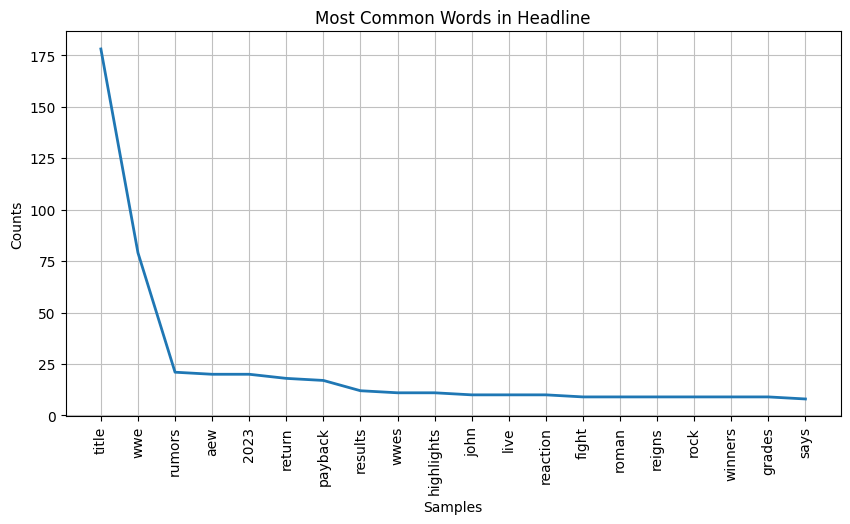

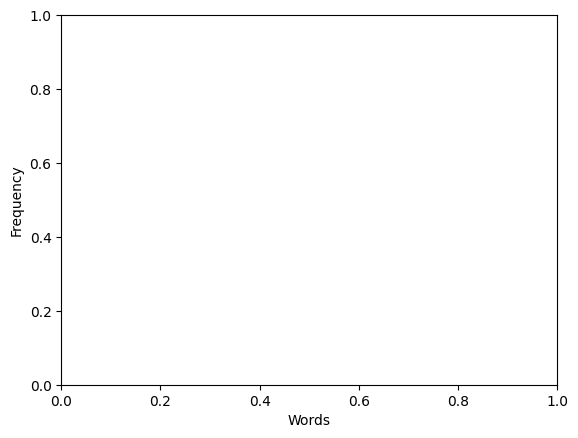

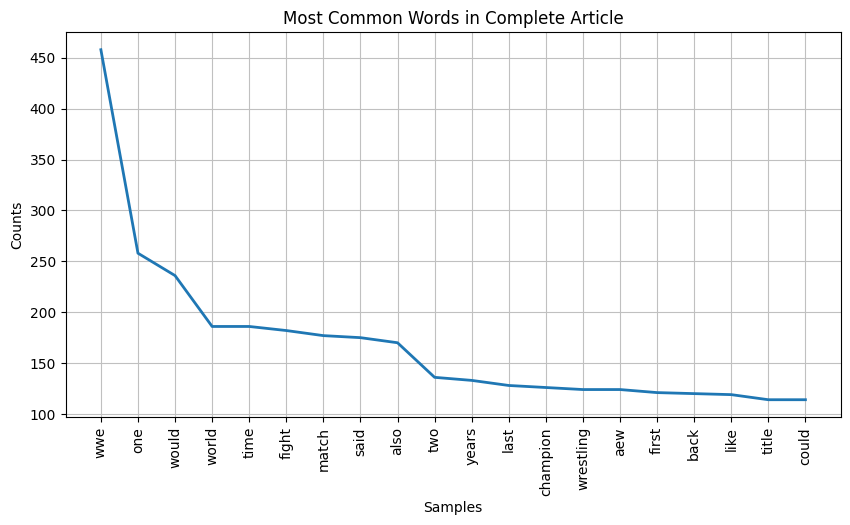

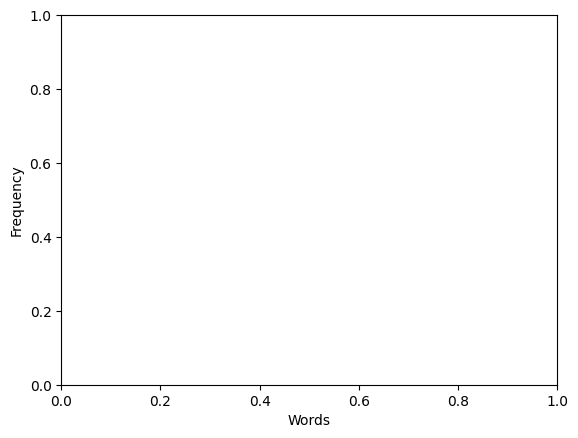

In [659]:
# Plotting the most common words in Headline
plt.figure(figsize=(10, 5))
Headline_freq_dist.plot(20, title='Most Common Words in Headline', cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

# Plotting the most common words in Complete Article
plt.figure(figsize=(10, 5))
Article_freq_dist.plot(20, title='Most Common Words in Complete Article', cumulative=False)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()

In [660]:
balanced_df.columns

Index(['Headline', 'Complete Article', 'Gender', 'Sentiment Score',
       'Sentiment Label', 'Complete Article Without Stopwords', 'Male_Count',
       'Female_Count', 'Female_Word_Count', 'Male_Word_Count',
       'Female_Athlete_Stereotypical_Word_Count',
       'Male_Athlete_Stereotypical_Word_Count', 'Female_Bias_Word_Count',
       'Male_Bias_Word_Count', 'Male_Name_Occurrence',
       'Female_Name_Occurrence'],
      dtype='object')

### Number of rows containing male & female athletes articles

In [661]:
# Keywords related to female athletes
female_keywords = [
    'female', 'woman', 'women', 'girl', 'lady', 'she', 'her', 'hers',
    'feminine', 'females', 'girls', 'female athlete', 'female athletes',
    'women athlete', 'women athletes', 'sportswoman', 'sportswomen',
    'athlete', 'sportsperson', 'gymnast', 'swimmer', 'runner',
    'tennis player', 'footballer', 'basketball player', 'volleyball player',
    'skater', 'diver', 'golfer', 'cyclist', 'hockey player',
    'athletics', 'sprinter', 'javelin thrower', 'long jumper', 'high jumper',
    'pole vaulter', 'shot putter', 'triple jumper', 'racewalker', 'heptathlete'
]

# Keywords related to male athletes
male_keywords = [
    'male', 'man', 'men', 'boy', 'he', 'him', 'his',
    'masculine', 'males', 'boys', 'male athlete', 'male athletes',
    'men athlete', 'men athletes', 'sportsman', 'sportsmen',
    'athlete', 'sportsperson', 'gymnast', 'swimmer', 'runner',
    'tennis player', 'footballer', 'basketball player', 'volleyball player',
    'skater', 'diver', 'golfer', 'cyclist', 'hockey player',
    'athletics', 'sprinter', 'javelin thrower', 'long jumper', 'high jumper',
    'pole vaulter', 'shot putter', 'triple jumper', 'racewalker', 'decathlete'
]

# Function to check if text contains female-related keywords
def contains_female_keywords(text):
    return any(keyword in text.lower() for keyword in female_keywords)

# Function to check if text contains male-related keywords
def contains_male_keywords(text):
    return any(keyword in text.lower() for keyword in male_keywords)

# Count rows related to female athletes in Headline
female_title_rows = balanced_df[balanced_df['Headline'].apply(contains_female_keywords)]
print(f"Rows related to female athletes in Headline: {len(female_title_rows)}")

# Count rows related to male athletes in Headline
male_title_rows = balanced_df[balanced_df['Headline'].apply(contains_male_keywords)]
print(f"Rows related to male athletes in Headline: {len(male_title_rows)}")

# Count rows related to female athletes in Article
female_content_rows = balanced_df[balanced_df['Complete Article'].apply(contains_female_keywords)]
print(f"\nRows related to female athletes in Complete Article: {len(female_content_rows)}")

# Count rows related to male athletes in Article
male_content_rows = balanced_df[balanced_df['Complete Article'].apply(contains_male_keywords)]
print(f"Rows related to male athletes in Complete Article: {len(male_content_rows)}")

Rows related to female athletes in Headline: 35
Rows related to male athletes in Headline: 103

Rows related to female athletes in Complete Article: 178
Rows related to male athletes in Complete Article: 194


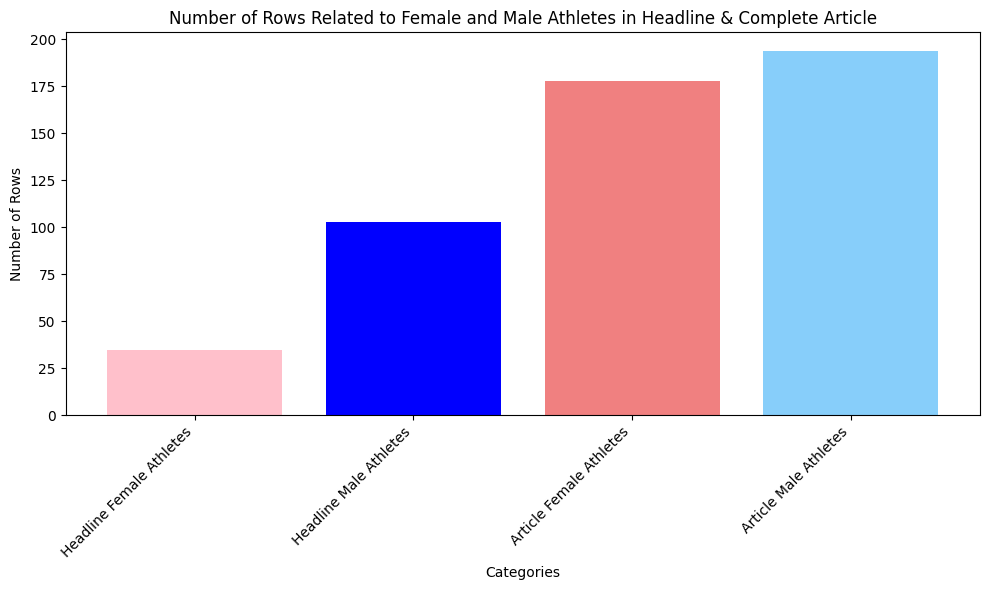

In [663]:
# Data for plotting
categories = ['Headline Female Athletes', 'Headline Male Athletes', 'Article Female Athletes', 'Article Male Athletes']
counts = [len(female_title_rows), len(male_title_rows), len(female_content_rows), len(male_content_rows)]

# Creating a bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, counts, color=['pink', 'blue', 'lightcoral', 'lightskyblue'])
plt.xlabel('Categories')
plt.ylabel('Number of Rows')
plt.title('Number of Rows Related to Female and Male Athletes in Headline & Complete Article')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show plot
plt.show()

<hr><hr>